# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [11]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from scipy.stats import multivariate_normal
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot  as plt 
import pandas as  pd 
import  numpy as np
import sklearn.preprocessing as prep
from  sklearn.datasets import  make_blobs
#from  plotnine import * 
from sklearn.neighbors  import NearestNeighbors 
from sklearn.cluster  import DBSCAN
from  sklearn.cluster  import  KMeans 
from  sklearn.mixture  import GaussianMixture
from  sklearn.metrics  import silhouette_score
from scipy.spatial.distance import cdist
#from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from scipy.stats import multivariate_normal
from sklearn import datasets

In [12]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



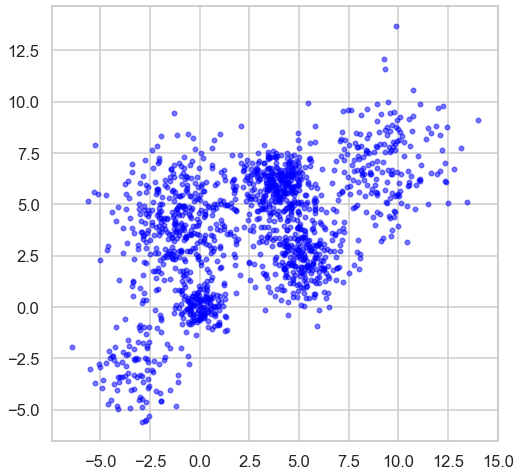

In [13]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

1 : 4.434614844733173
2 : 3.029608976322601
3 : 2.5626172270834195
4 : 2.106531373883988
5 : 1.7169227547484116
6 : 1.5038198239624962
7 : 1.4108509001603364
8 : 1.3499107568034652
9 : 1.287814972160402
10 : 1.225488957210652
11 : 1.1833473841550377
12 : 1.1403113679300816
13 : 1.1038236398475878
14 : 1.0590799552965693


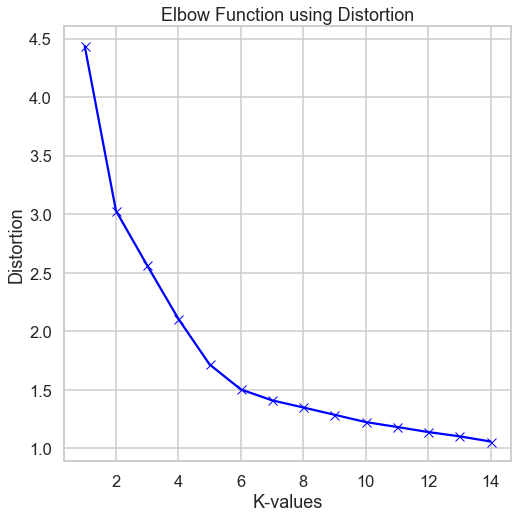

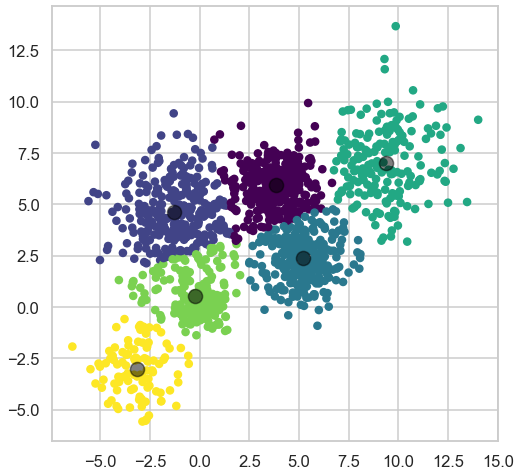

In [14]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk' #List colors
    alpha = 0.5 #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
n_bins = 6
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],centers=centers, shuffle=False, random_state=42)


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
X=Multi_blob_Data 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
   
    
for key, val in mapping1.items():
    print(f'{key} : {val}')
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('K-values')
plt.ylabel('Distortion')
plt.title('Elbow Function using Distortion')
plt.show()


kmeans = KMeans(n_clusters=6).fit(Multi_blob_Data)
y_kmeans = kmeans.predict(Multi_blob_Data)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);




### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

For n_clusters = 2 The average silhouette_score is : 0.4751544541991239
For n_clusters = 3 The average silhouette_score is : 0.43631793714185435
For n_clusters = 4 The average silhouette_score is : 0.4628725400351352
For n_clusters = 5 The average silhouette_score is : 0.48100602217073096
For n_clusters = 6 The average silhouette_score is : 0.4862794240733028
For n_clusters = 7 The average silhouette_score is : 0.46340972197949165
For n_clusters = 8 The average silhouette_score is : 0.44493023637355594
For n_clusters = 9 The average silhouette_score is : 0.4517589867942137
For n_clusters = 10 The average silhouette_score is : 0.39749218079134757
For n_clusters = 11 The average silhouette_score is : 0.40170974932462034
For n_clusters = 12 The average silhouette_score is : 0.3950232743020398
For n_clusters = 13 The average silhouette_score is : 0.37041811745707226
For n_clusters = 14 The average silhouette_score is : 0.3725671261300605


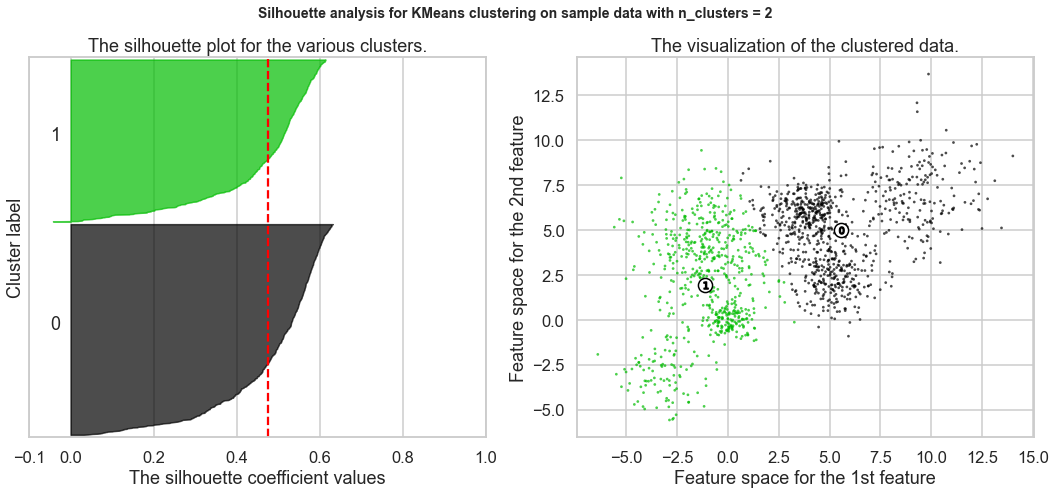

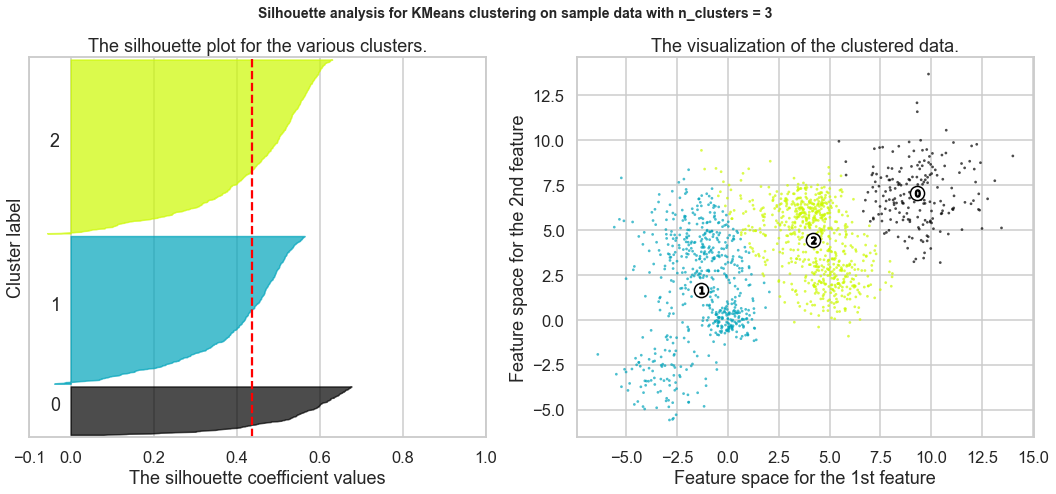

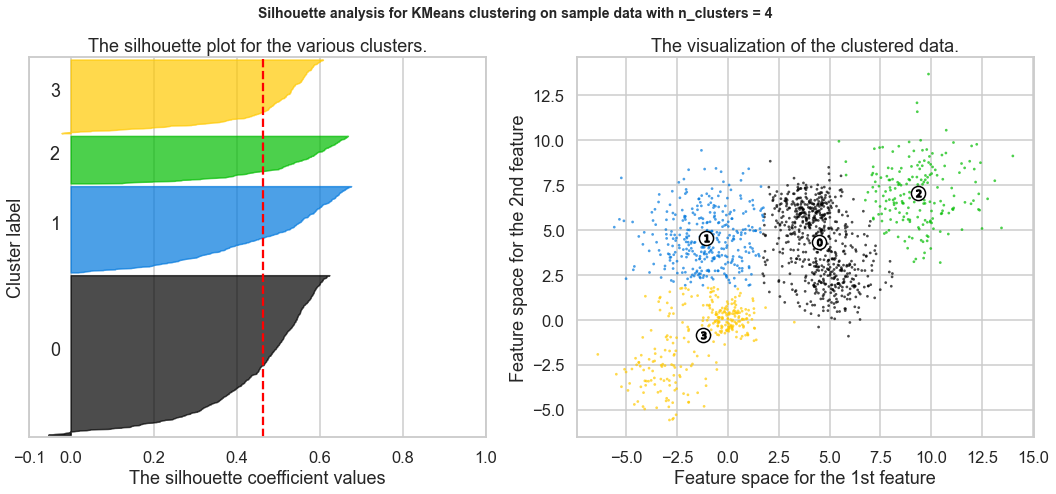

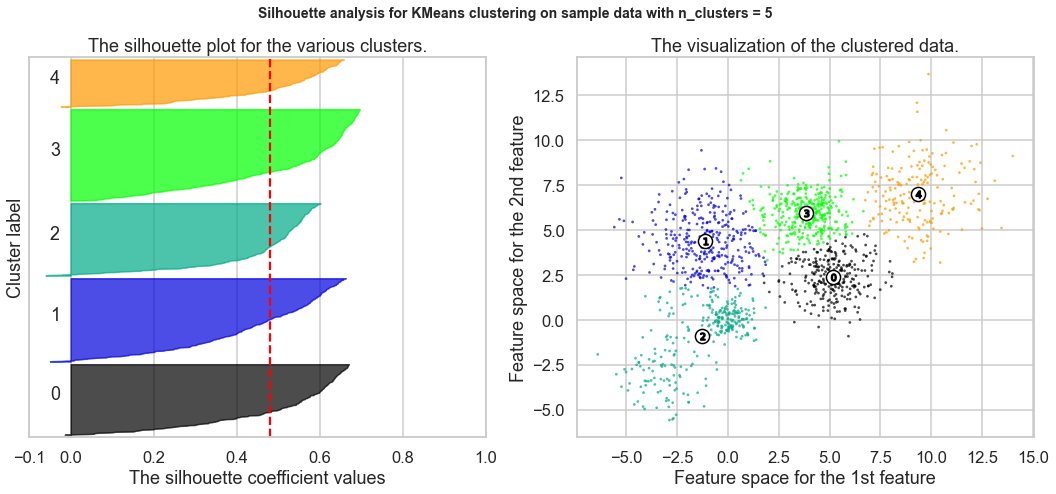

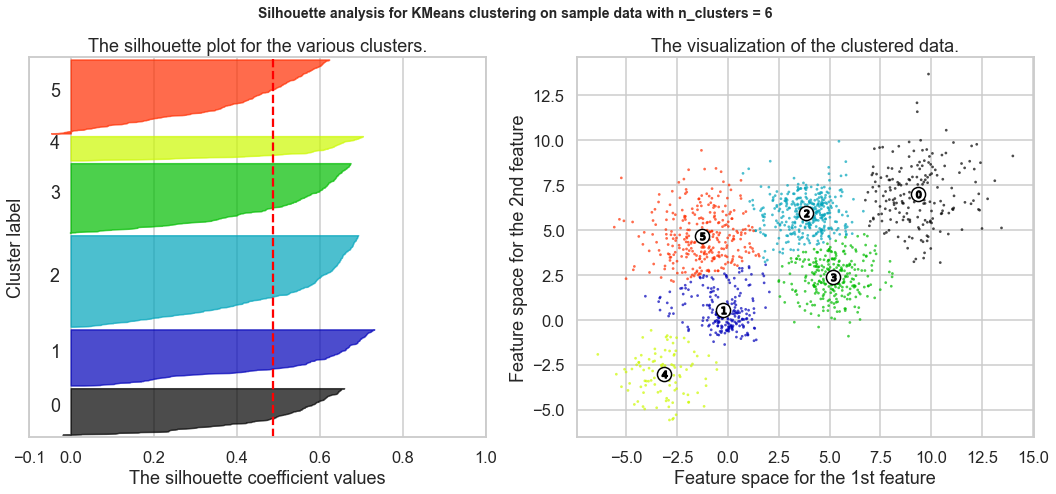

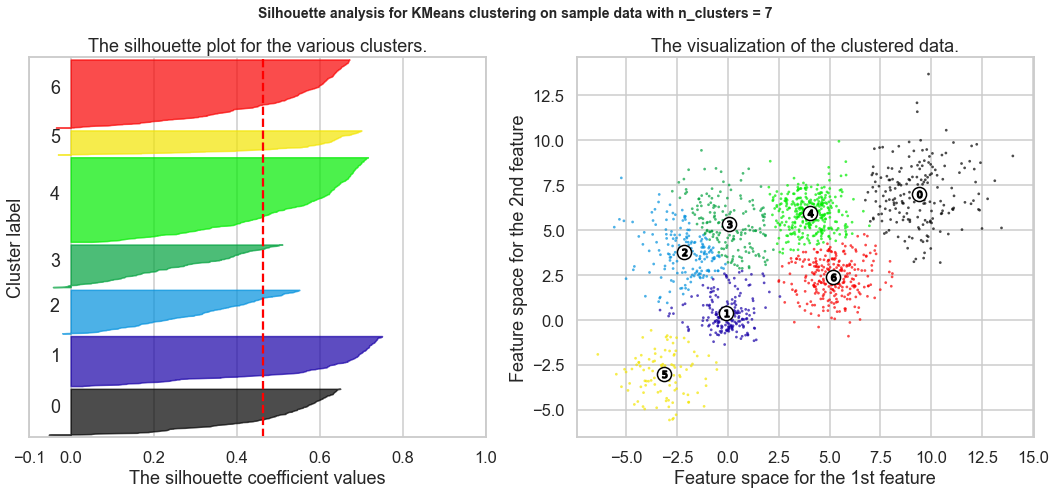

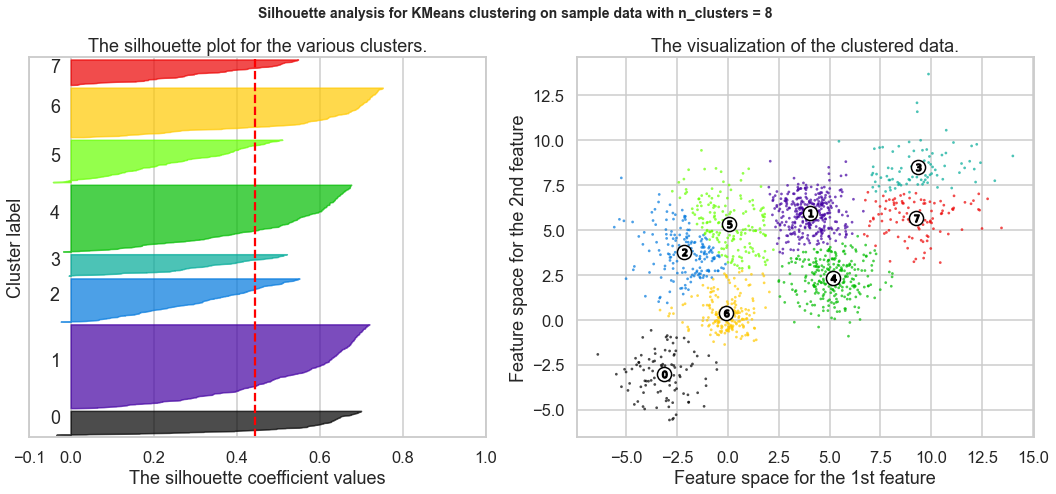

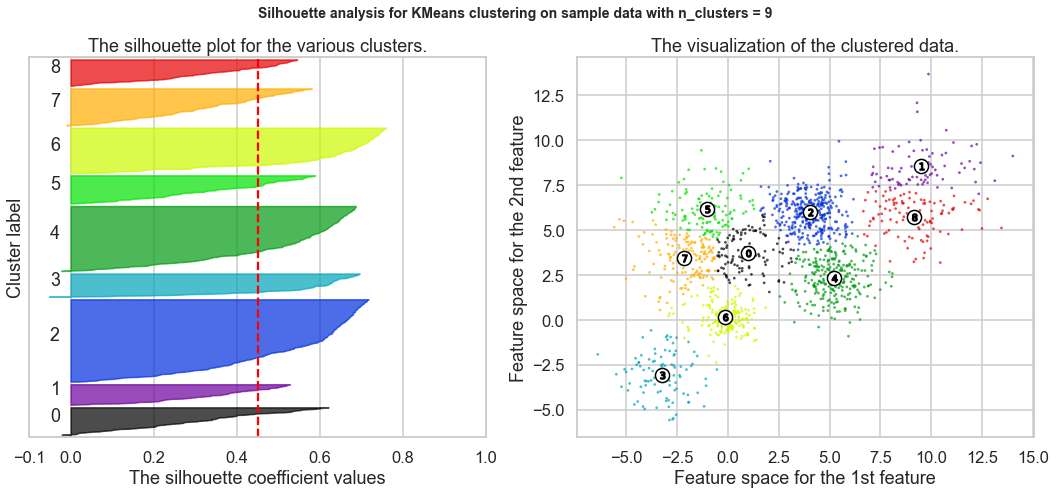

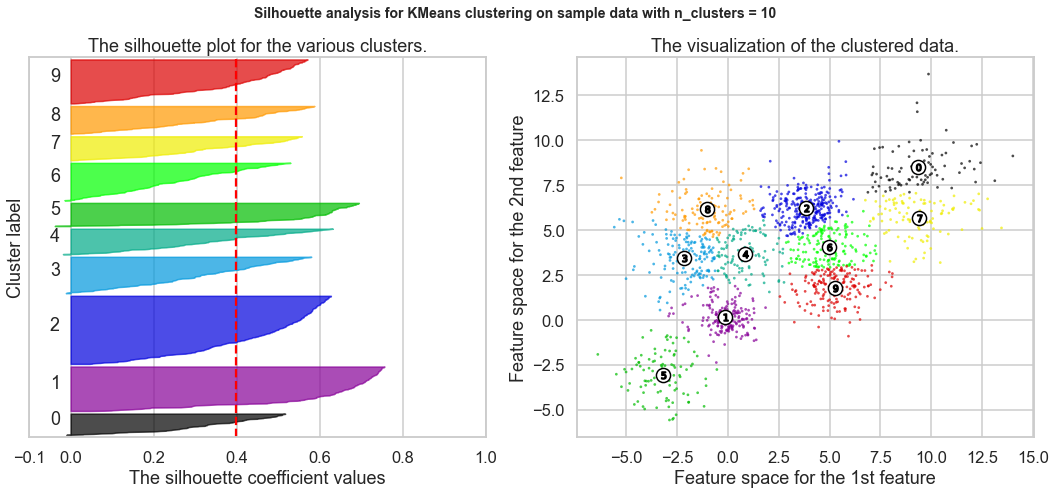

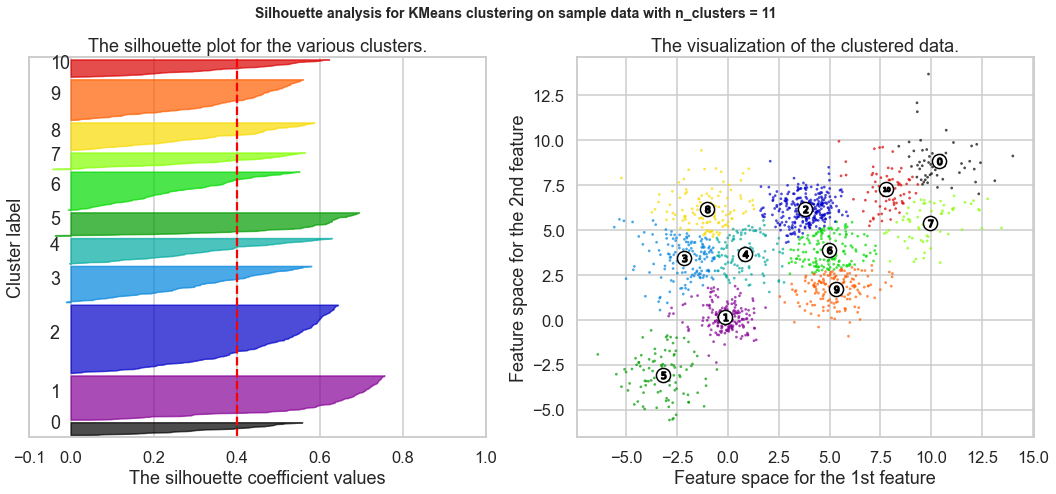

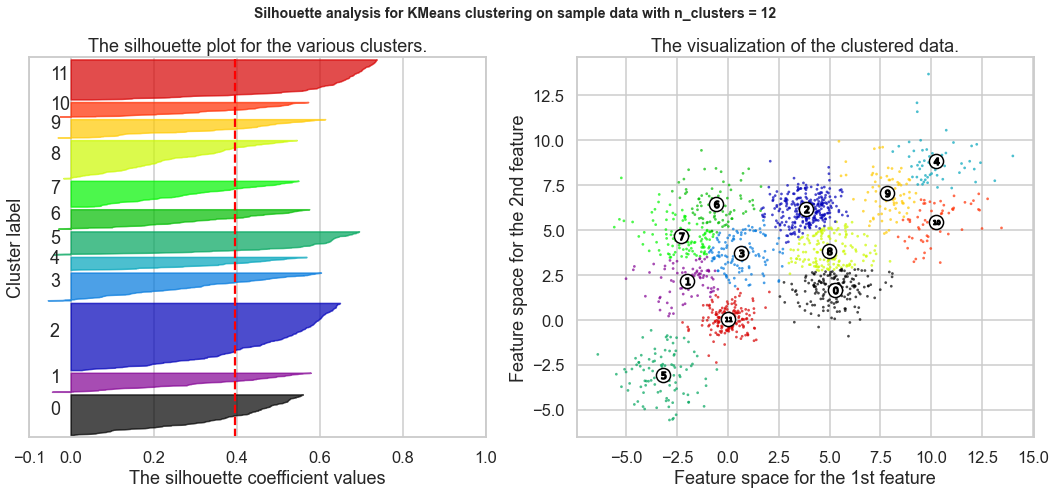

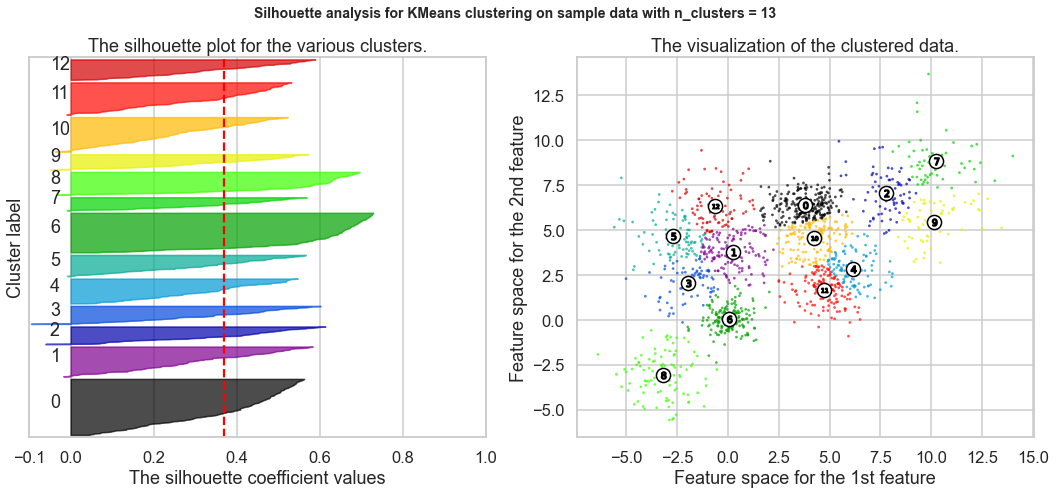

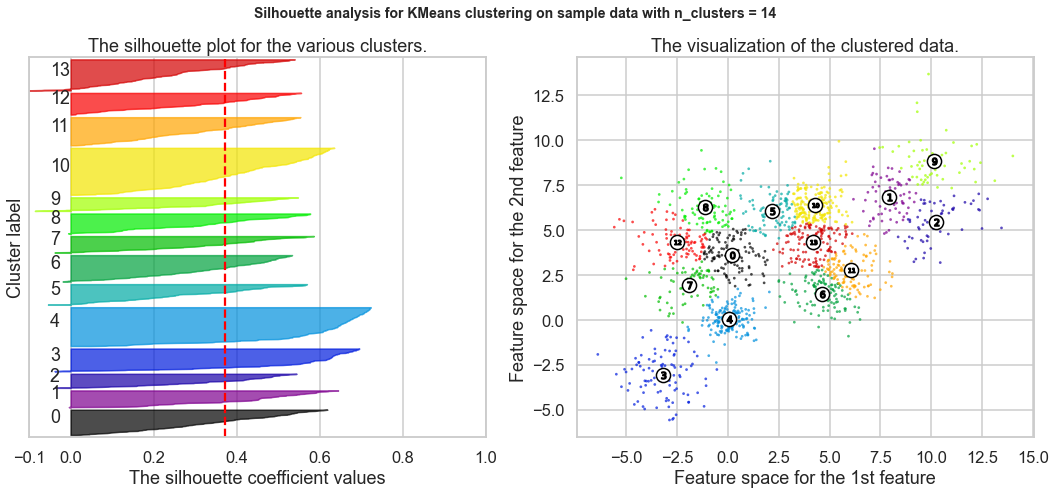

In [15]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14]
scores=[]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    scores=np.append(scores,silhouette_avg)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg,)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)
  
K_used=np.argmax(scores)+2
Best_score=np.max(scores)
plt.show()


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

[-1 -1 -1 ... -1 -1 -1]
['y', 'b', 'g', 'r', 'c', 'm']


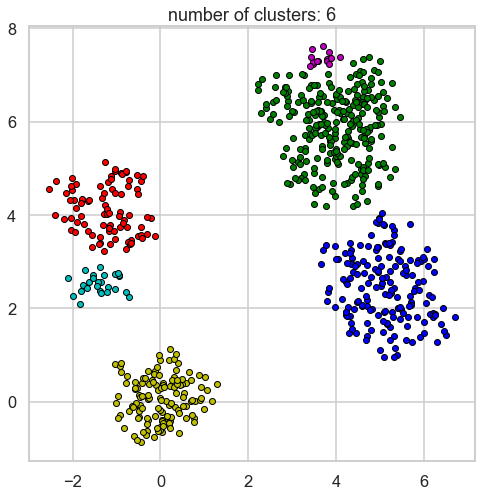

[-1 -1 -1 ... -1 -1 19]
Estimated number of clusters: 26
Silhouette Coefficient: -0.251
[ 0  0  0 ... -1 -1  0]
Estimated number of clusters: 2
Silhouette Coefficient: 0.236
[ 0  0  0 ... -1 -1  0]
Estimated number of clusters: 1
[ 0  0  0 ... -1  0  0]
Estimated number of clusters: 1
[ 0  0  0 ... -1  0  0]
Estimated number of clusters: 1
[ 0  0  0 ... -1  0  0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
[0

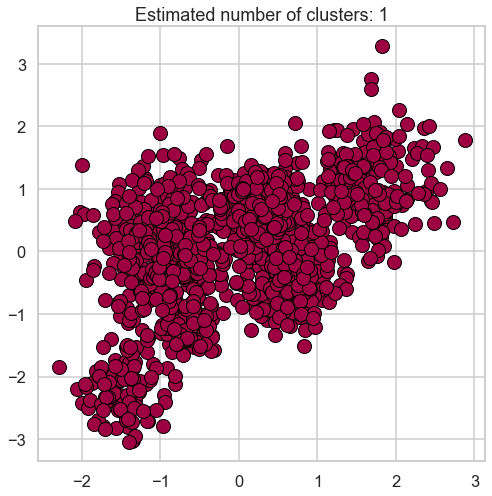

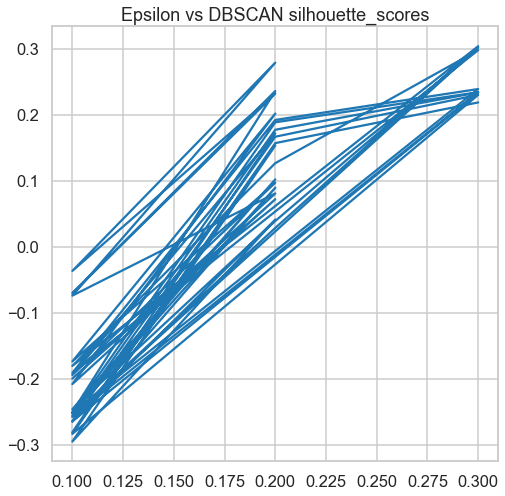

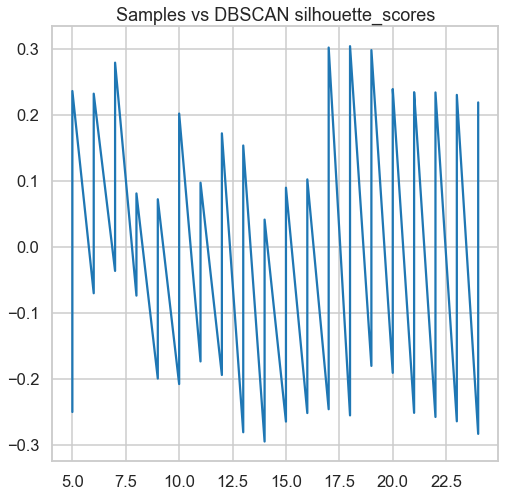

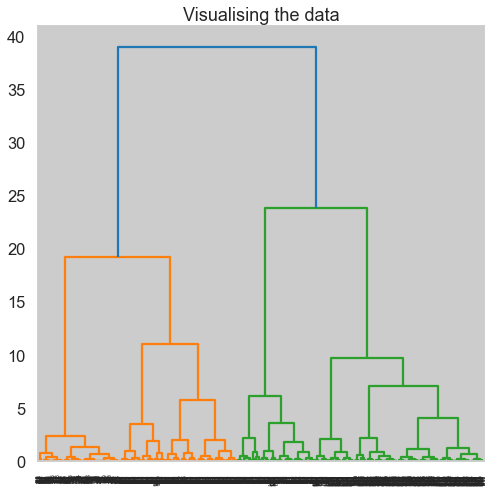

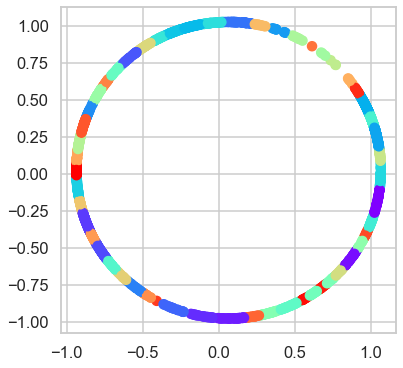

dist 0.1
sil_score [0.5186234303338386]


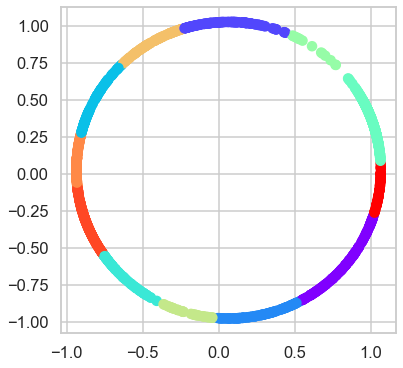

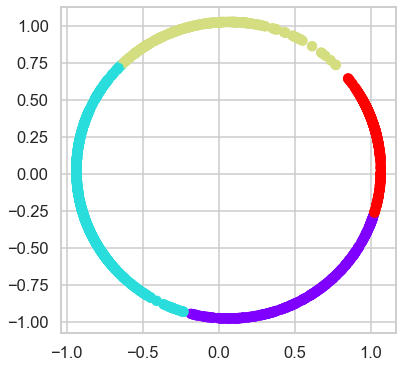

dist 1.1
sil_score [0.5186234303338386, 0.5127753834058649, 0.6057607157367038]


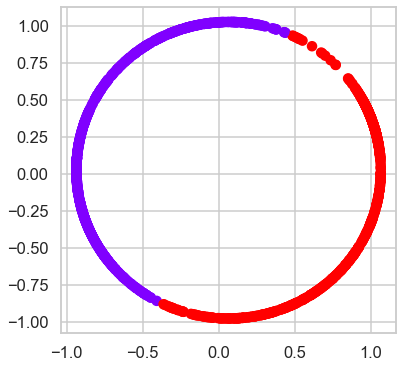

In [16]:
db = DBSCAN(eps=0.4, min_samples=12).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)
  
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r','c','m']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,markeredgecolor='k',markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,markeredgecolor='k',markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()



##################  sillolutte for DBscan ###################


centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
X, labels_true = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],centers=centers, shuffle=False, random_state=42)
X = StandardScaler().fit_transform(X)
epsilon=np.arange(0.1,3,0.1)
min_samples=np.arange(5,25,1)

dbscan_score=[];
score=0;
k_clusters=[];
all_scores=[];
epsi=[];
samples=[];
for s in min_samples:
    dbscan_score=[];
    for e in epsilon:
        db = DBSCAN(eps=e, min_samples=s).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        print(labels)

# Number of clusters in labels, ignoring noise if present.

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        print("Estimated number of clusters: %d" % n_clusters_)
        
        if n_clusters_!=1:
            print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
            score=metrics.silhouette_score(X, labels);
            dbscan_score.append(score)
            all_scores.append(score)
            k_clusters.append(n_clusters_)
            epsi.append(e)
            samples.append(s)
            


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14,)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0],xy[:, 1], "o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=6,)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()
# Plot result

max_score_index=np.argmax(all_scores)
best_epsion=epsi[max_score_index]
best_samples=samples[max_score_index]
best_score=all_scores[max_score_index]
best_k=k_clusters[max_score_index]

plt.figure()
plt.plot(epsi,all_scores)
plt.title("Epsilon vs DBSCAN silhouette_scores")

plt.figure()
plt.plot(samples,all_scores)
plt.title("Samples vs DBSCAN silhouette_scores")

##################  Hierarchal  ###################
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
distance_th=np.arange(0.1,2,1)
silhouette_scores = []
for i in range(np.size(distance_th)):
    H1=AgglomerativeClustering(n_clusters =None,affinity='euclidean',linkage='single',distance_threshold=distance_th[i])
    H1_p=H1.fit_predict(X_principal)
    H1_clusters=np.max(H1_p)+1
    if H1_clusters!=1:
        silhouette_scores.append(silhouette_score(X_principal, H1.fit_predict(X_principal)))
        plt.figure(figsize =(6, 6))
        plt.scatter(X_principal['P1'], X_principal['P2'], c = H1.fit_predict(X_principal), cmap ='rainbow')
        plt.show()

   
    H2=AgglomerativeClustering(n_clusters =None,affinity='manhattan',linkage='average',distance_threshold=distance_th[i])
    H2_p=H2.fit_predict(X_principal)
    H2_clusters=np.max(H2_p)+1
    if H2_clusters!=1:
        silhouette_scores.append(silhouette_score(X_principal, H2.fit_predict(X_principal)))
        plt.figure(figsize =(6, 6))
        plt.scatter(X_principal['P1'], X_principal['P2'], c = H2.fit_predict(X_principal), cmap ='rainbow')
        plt.show()
    print('dist',distance_th[i])
    print('sil_score',silhouette_scores)
    
    H3=AgglomerativeClustering(n_clusters = None,affinity='cosine',linkage='average',distance_threshold=distance_th[i])
    H3_p=H3.fit_predict(X_principal)
    H3_clusters=np.max(H3_p)+1
    if H3_clusters!=1:
        silhouette_scores.append(silhouette_score(X_principal, H3.fit_predict(X_principal)))
        plt.figure(figsize =(6, 6))
        plt.scatter(X_principal['P1'], X_principal['P2'], c = H3.fit_predict(X_principal), cmap ='rainbow')
        plt.show()
       
final_s=np.max(silhouette_scores)     # get corresponsding parameters

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

Converged: True
[[1.03465767e-04 9.97665572e-01 2.23096182e-03]]


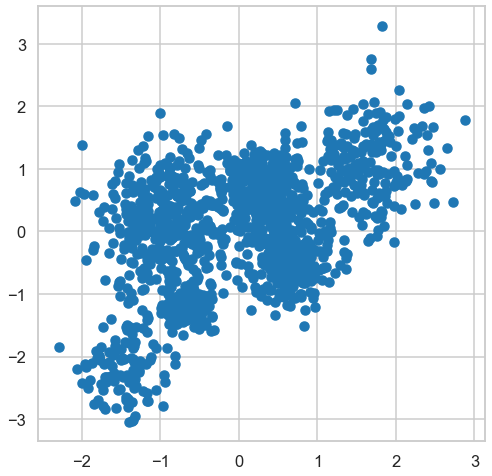

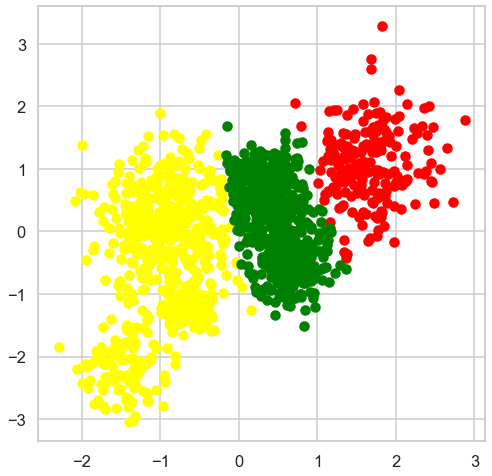

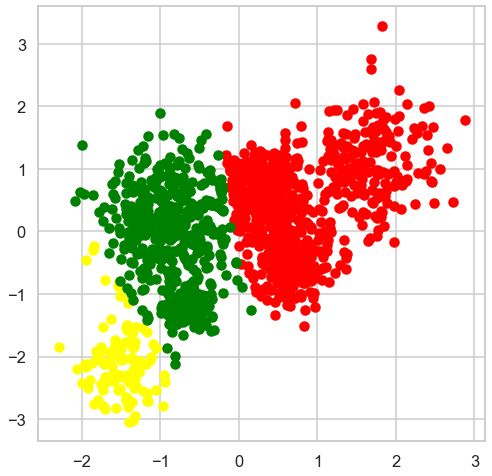

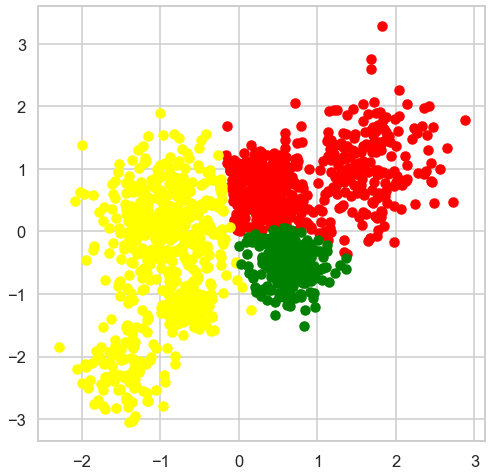

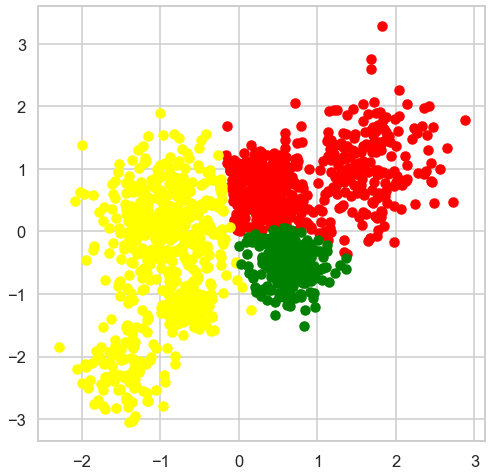

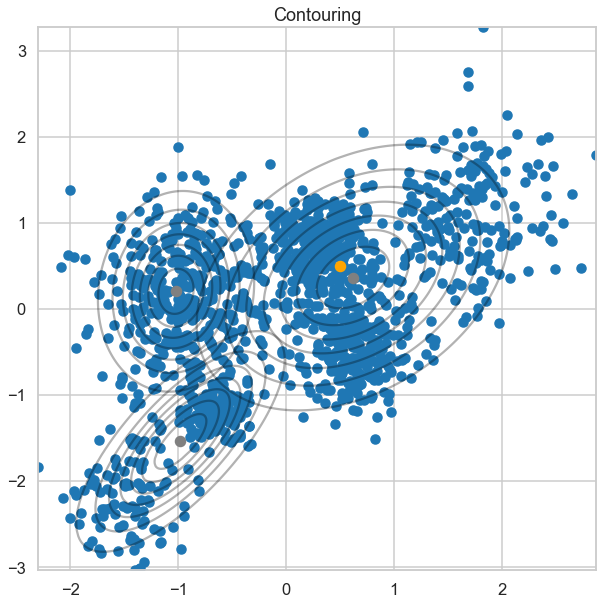

best score of kmeans 0.4862794240733028
best score of DBSCAN 0.3038104049605378
best score of Hierarchal 0.6057607157367038


In [17]:
d = pd.DataFrame(X)
 
# plot the data
plt.scatter(d[0], d[1])
gmm = GaussianMixture(n_components = 3,covariance_type='full')
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.figure()
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')

# plt.scatter(d[0], d[1])
gmm = GaussianMixture(n_components = 3,covariance_type='tied')
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.figure()
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')


# plt.scatter(d[0], d[1])
gmm = GaussianMixture(n_components = 3,covariance_type='spherical')
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.figure()
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')

# plt.scatter(d[0], d[1])
gmm = GaussianMixture(n_components = 3,covariance_type='diag')
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.figure()
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')



# Stratch dataset to get ellipsoid data
#X = np.dot(X,np.random.RandomState(0).randn(2,2))

x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

GMM = GaussianMixture(n_components=3).fit(X) # Instantiate and fit the model
print('Converged:',GMM.converged_) # Check if the model has converged
means = GMM.means_ 
covariances = GMM.covariances_


# Predict
Y = np.array([[0.5],[0.5]])
prediction = GMM.predict_proba(Y.T)
print(prediction)

# Plot   
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(X[:,0],X[:,1])
ax0.scatter(Y[0,:],Y[1,:],c='orange',zorder=10,s=100)
for m,c in zip(means,covariances):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
    ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
    
plt.title('Contouring')    
plt.show()
Best_score=np.max(scores)
best_score=all_scores[max_score_index]
final_s=np.max(silhouette_scores)
print('best score of kmeans',Best_score)
print('best score of DBSCAN',best_score)
print('best score of Hierarchal',final_s)
#comments:
    #the best score resulted in using heirarichal clustering technique 
    #the score resulted using this technique is 0.605 using affinity='manhattan',linkage='average', dist_threshold=1.1
    #the score of DBscan score is resulted when epsilon was 0.3 and number of samples is 18

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


1 : 0.13046592108980165
2 : 0.09058561757635038
3 : 0.07077127530140641
4 : 0.0634989292595424
5 : 0.056268760829529814
6 : 0.052128819468857
7 : 0.047304736829288915
8 : 0.044952937282357115
9 : 0.04242795233769638
10 : 0.03868448187533211
11 : 0.03616640447535008
12 : 0.033422177211922435
13 : 0.032049368058895106
14 : 0.03055305706720649


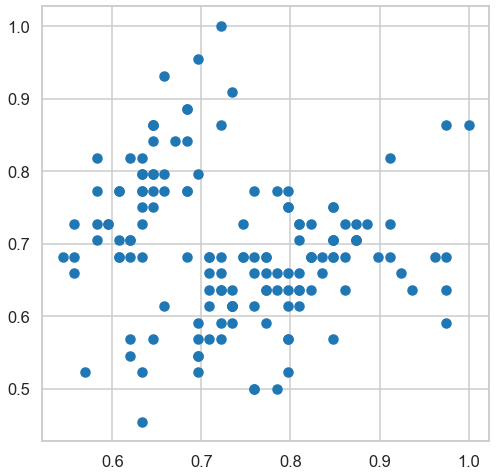

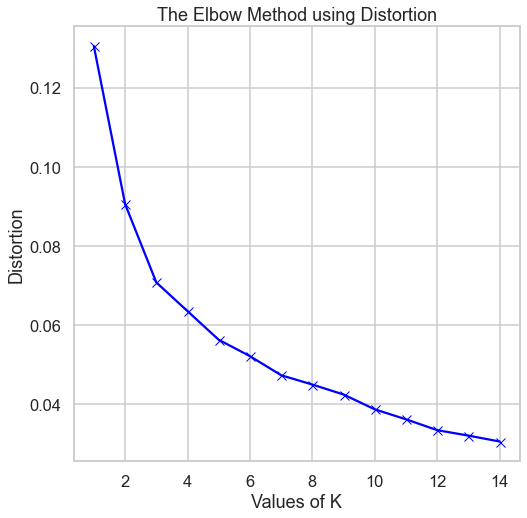

For n_clusters = 2 The average silhouette_score is : 0.44704252804060746
For n_clusters = 3 The average silhouette_score is : 0.44178216150914634
For n_clusters = 4 The average silhouette_score is : 0.41771070885211875
For n_clusters = 5 The average silhouette_score is : 0.3946323873612004
For n_clusters = 6 The average silhouette_score is : 0.3959241193002857
For n_clusters = 7 The average silhouette_score is : 0.38907361771375404
For n_clusters = 8 The average silhouette_score is : 0.40660599410490034
For n_clusters = 9 The average silhouette_score is : 0.4225507727107965
For n_clusters = 10 The average silhouette_score is : 0.41174677774617746
For n_clusters = 11 The average silhouette_score is : 0.4199392478856492
For n_clusters = 12 The average silhouette_score is : 0.41842811260439966
For n_clusters = 13 The average silhouette_score is : 0.41799497145485154
For n_clusters = 14 The average silhouette_score is : 0.39190718142125924


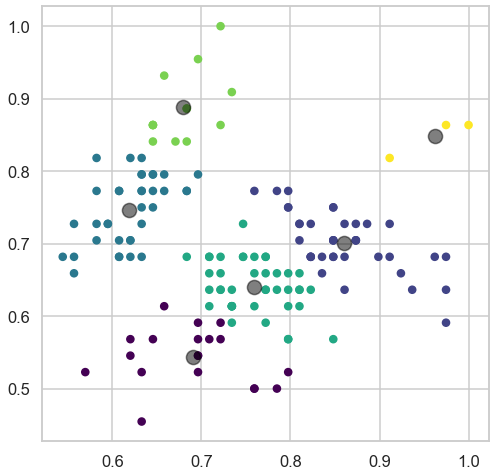

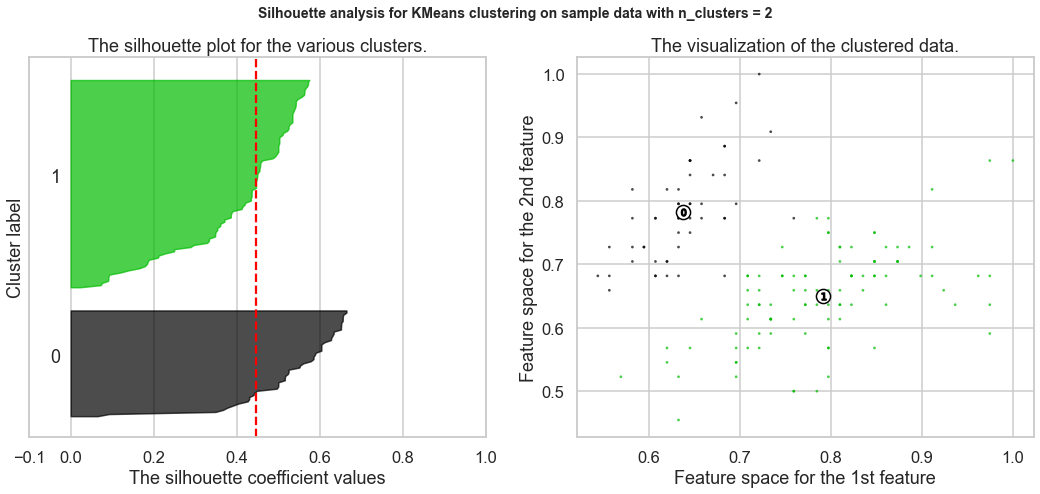

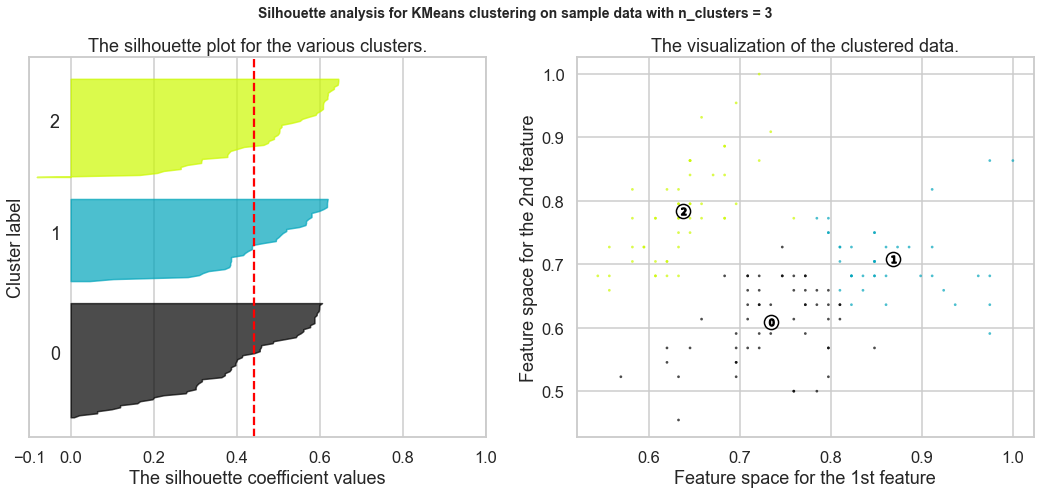

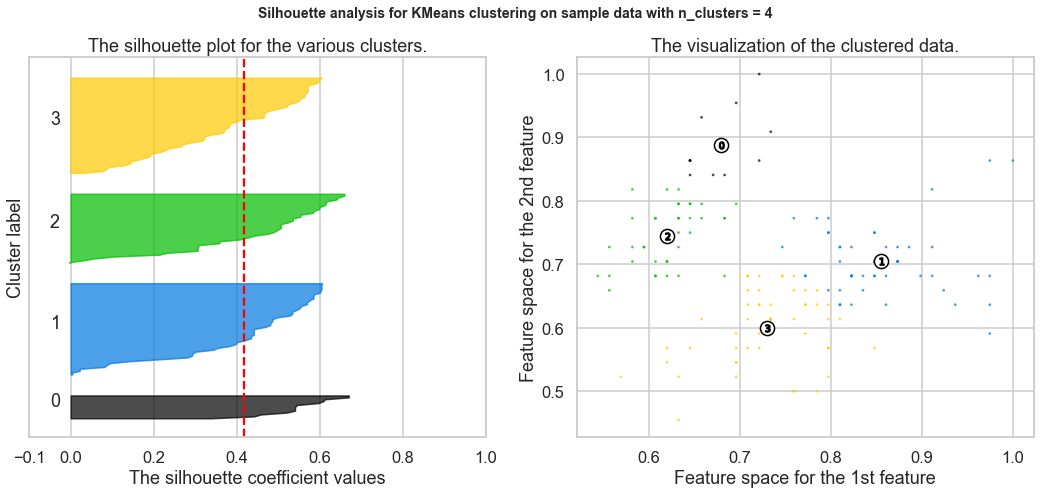

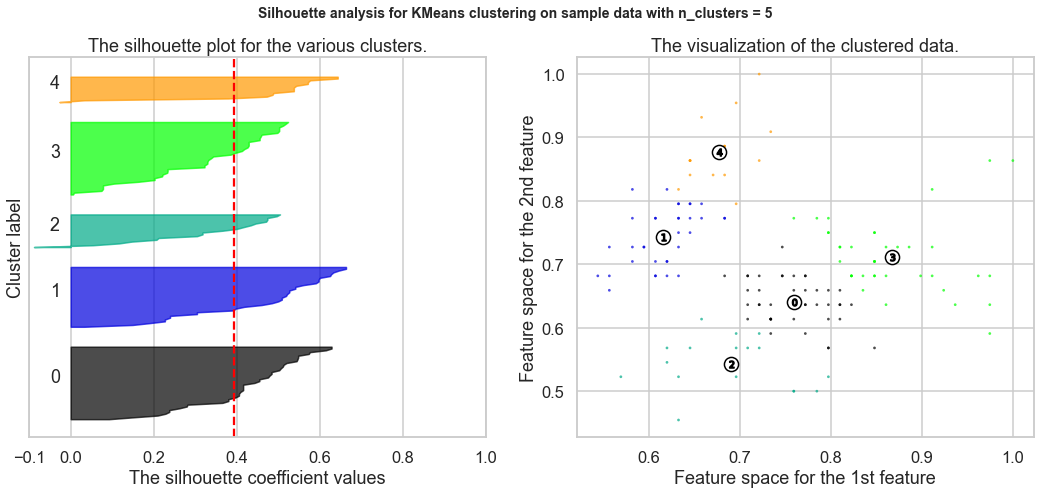

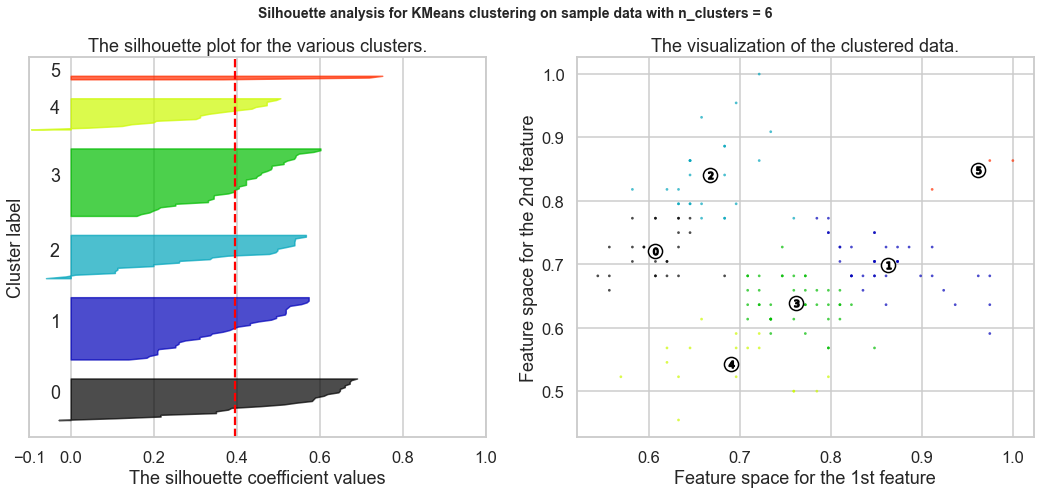

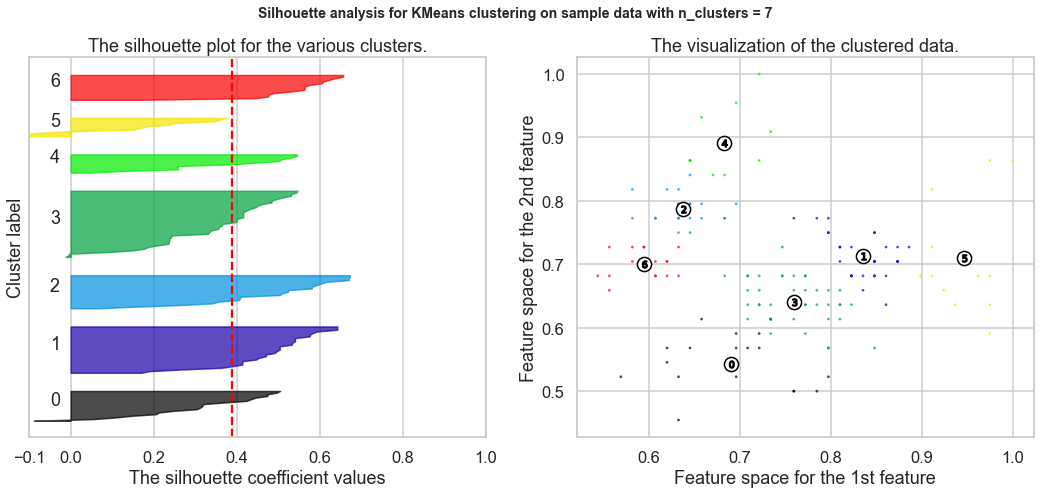

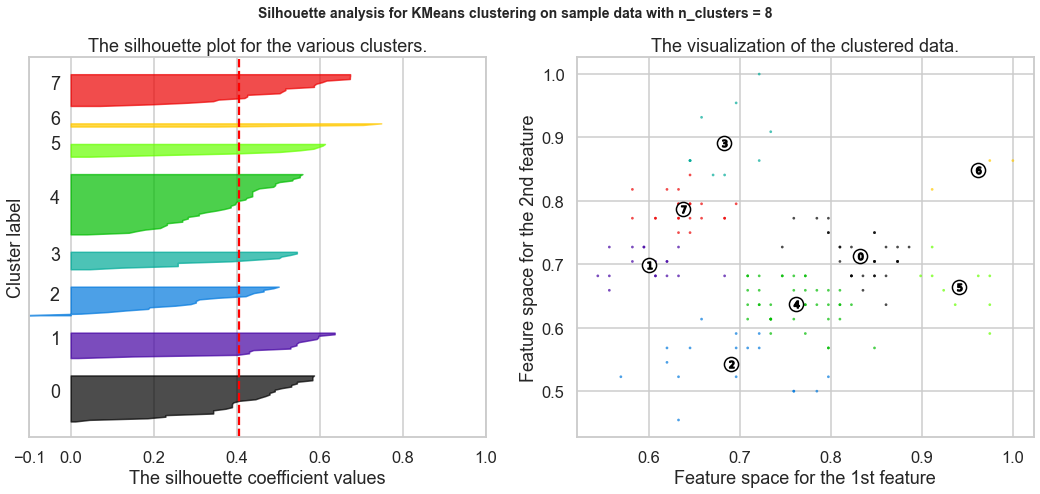

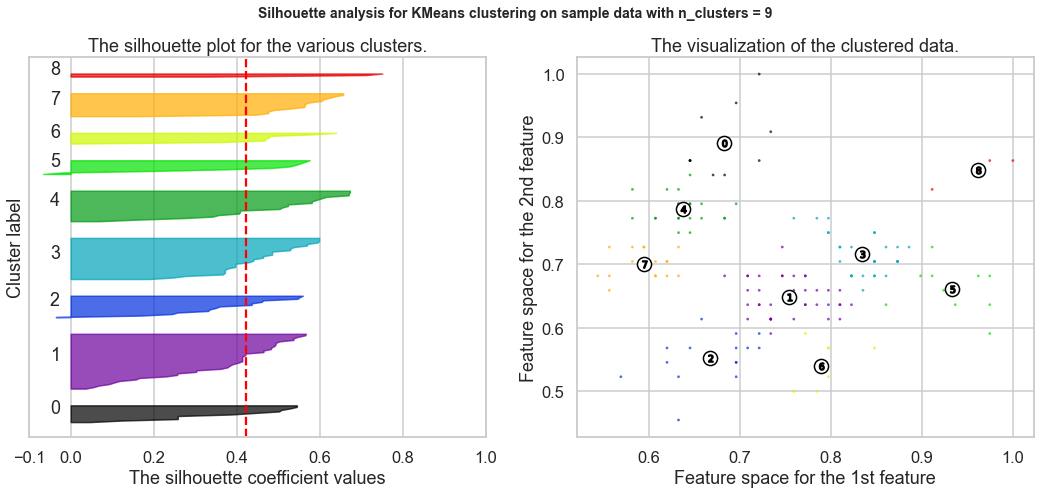

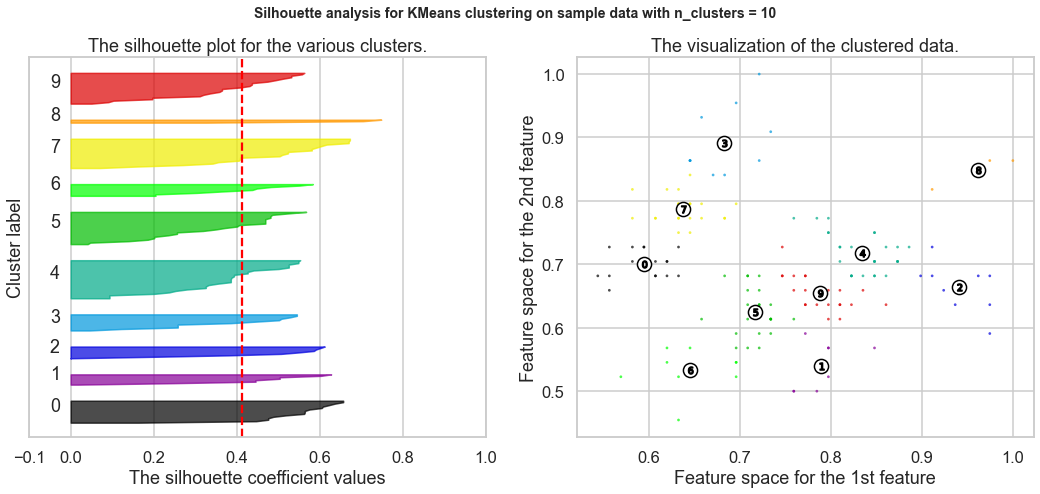

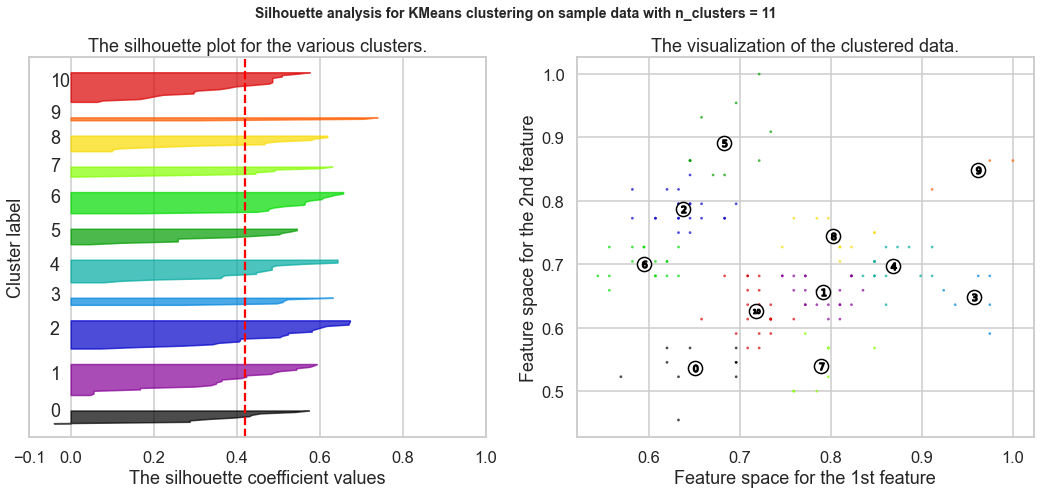

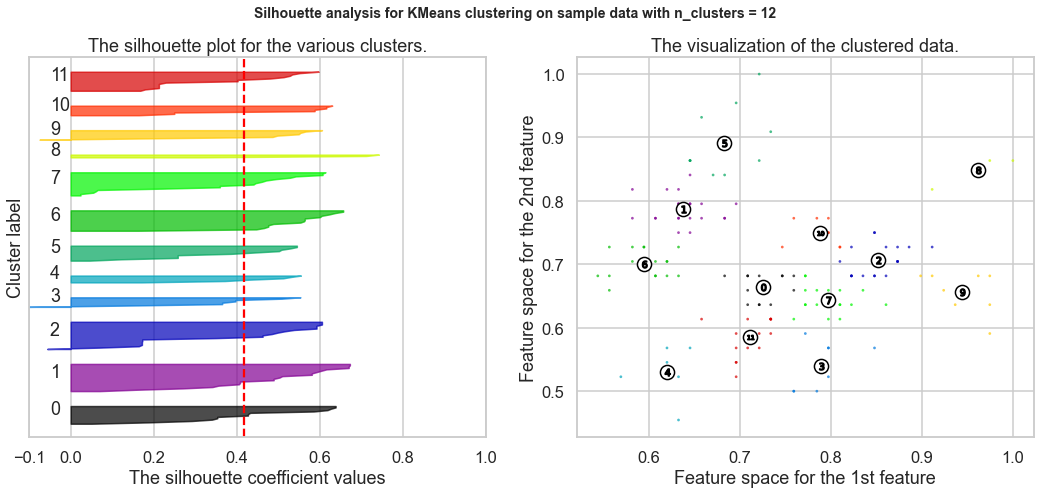

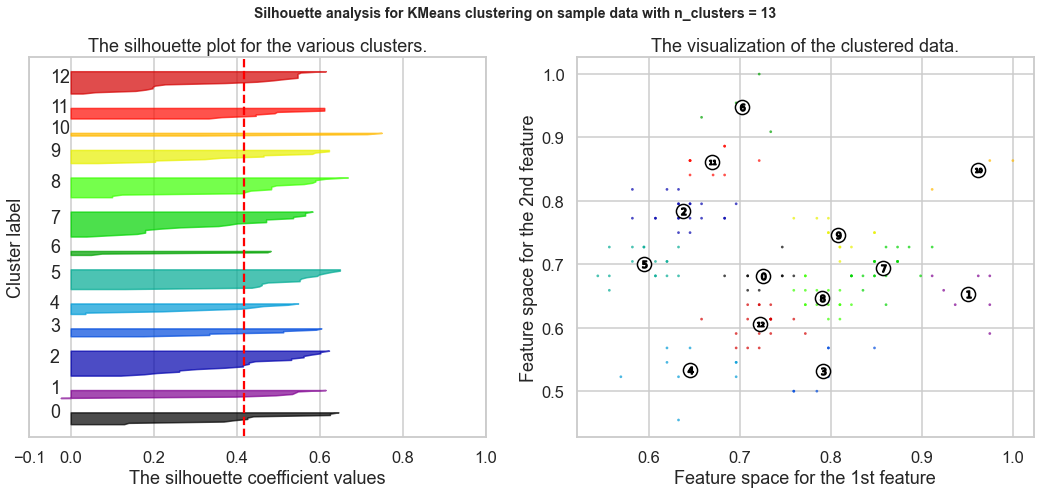

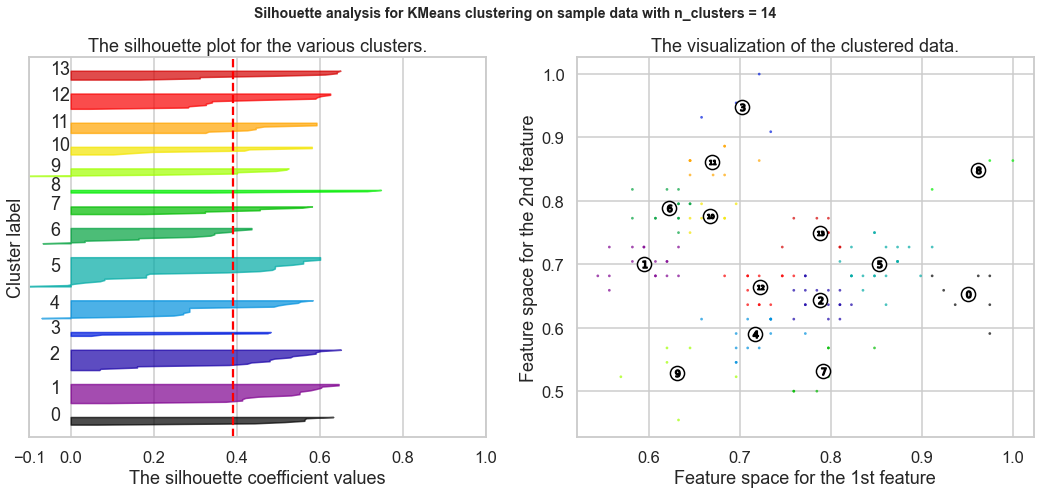

Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimate

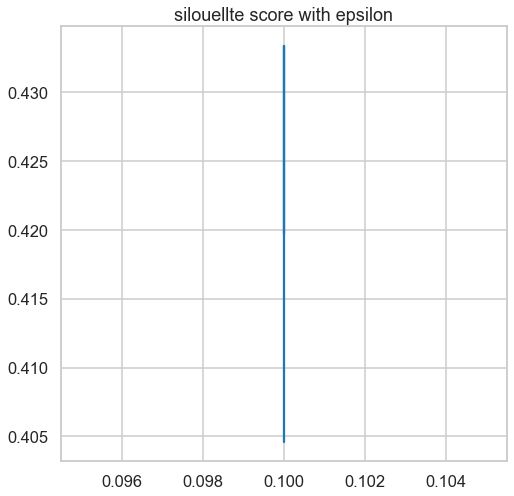

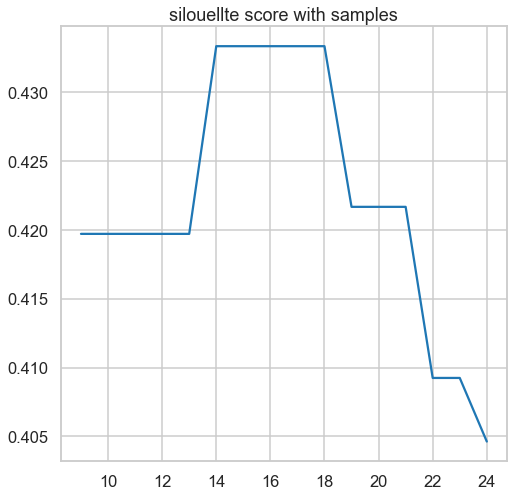

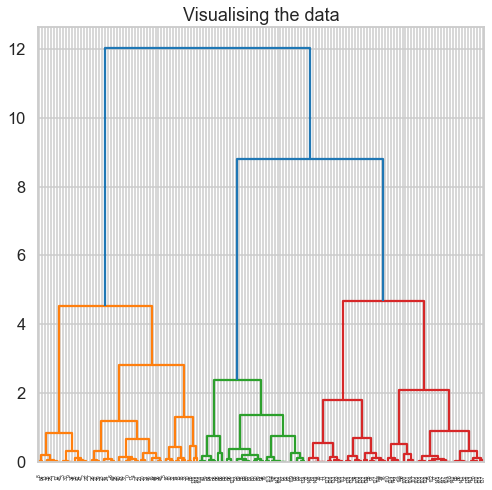

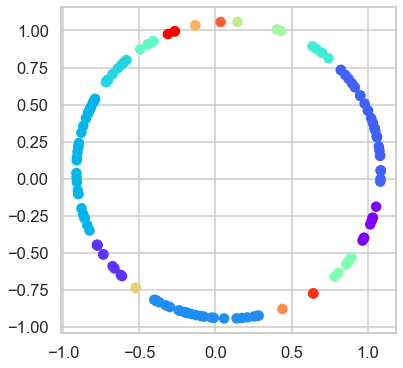

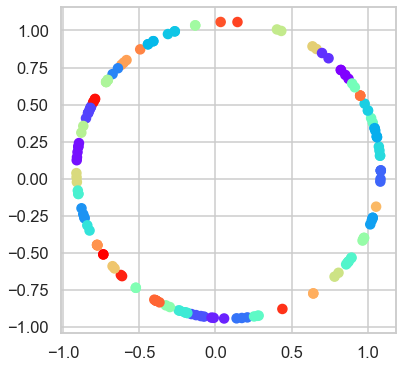

dist 0.1
sil_score [0.3376657574867428, 0.6511471493556872]


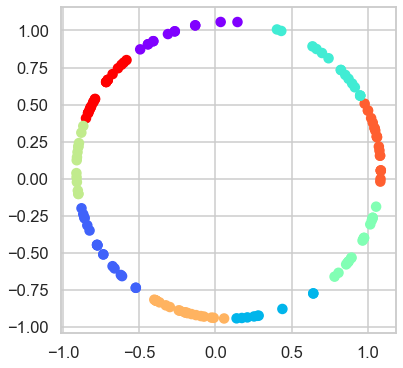

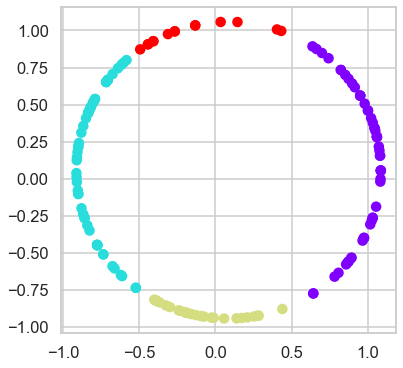

dist 1.1
sil_score [0.3376657574867428, 0.6511471493556872, 0.5580988252409722, 0.4559275119786264]


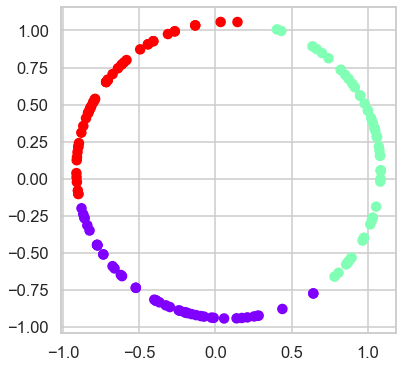

Converged: True
[[0.36671134 0.00194793 0.63134073]]


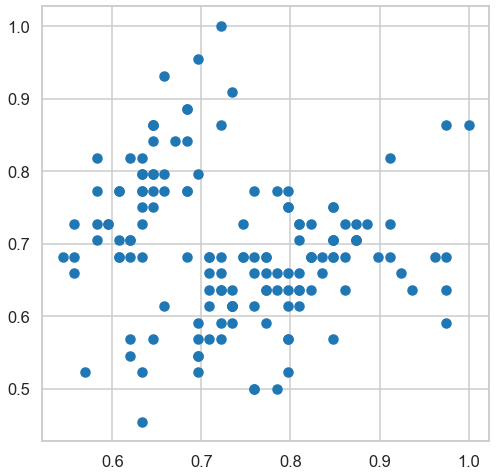

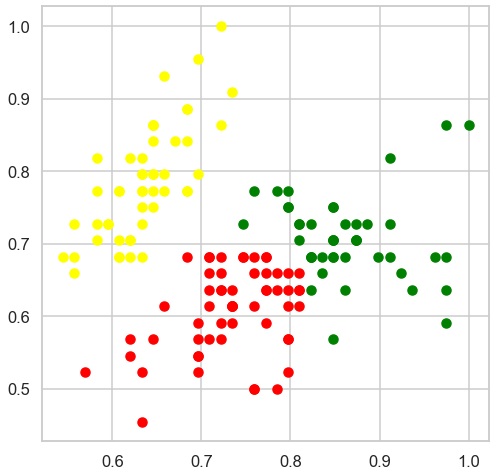

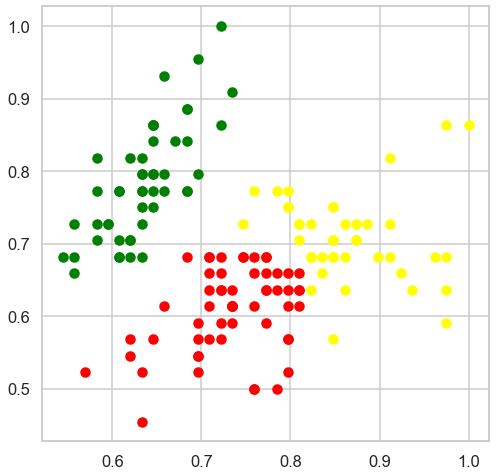

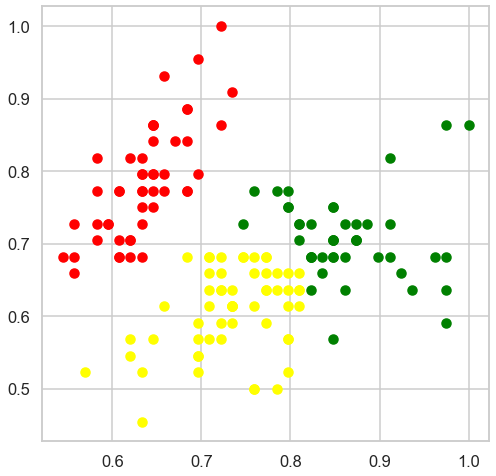

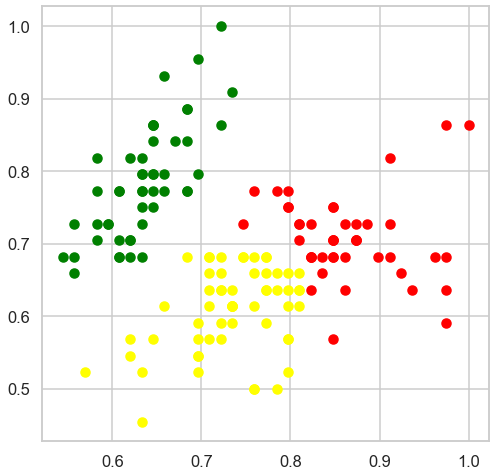

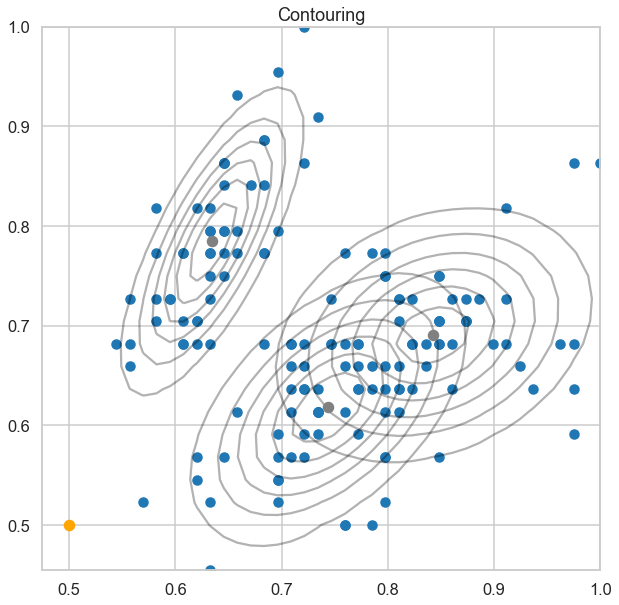

best score of kmeans 0.44704252804060746
best score of DBSCAN 0.43335105963591425
best score of Hierarchal 0.6511471493556872


In [21]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris
from sklearn import datasets


######### Iris  ############

iris = datasets.load_iris()

# select first two columns
X = iris.data[:, :2]
max1= X[:,0].max()
X[:,0]=X[:,0]/max1

max2= X[:,1].max()
X[:,1]=X[:,1]/max2

# turn it into a dataframe
d = pd.DataFrame(X)

 
# plot the data
plt.scatter(d[0], d[1])

################### KMeans ##################
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk' #List colors
    alpha = 0.5 #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
n_bins = 6
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
   
    
for key, val in mapping1.items():
    print(f'{key} : {val}')
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


kmeans = KMeans(n_clusters=6).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14]
scores=[]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    scores=np.append(scores,silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)
  
K_used=np.argmax(scores)+2
Best_score=np.max(scores)
plt.show()


###############   DBSCAN   ################

db = DBSCAN(eps=0.5,min_samples=5) 
db.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
epsilon=np.arange(0.1,3,0.1)
min_samples=np.arange(5,25,1)

dbscan_score=[];
score=0;
k_clusters=[];
all_scores=[];
ep=[]
samples=[]
for s in min_samples:
    dbscan_score=[];
    for e in epsilon:
        db = DBSCAN(eps=e, min_samples=s).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        # print(labels)

# Number of clusters in labels, ignoring noise if present.

        n_clusters_ = len(set(labels)) 
        # n_clusters_ = db.fit_predict(X)- (1 if -1 in labels else 0)
        # n_noise_ = list(labels).count(-1)

        print("Estimated number of clusters: %d" % n_clusters_)
        if  n_clusters_!=1:
            print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
            score=metrics.silhouette_score(X, labels);
            dbscan_score.append(score)
            all_scores.append(score)
            k_clusters.append(n_clusters_)
            ep.append(e)
            samples.append(s)

max_score_index=np.argmax(all_scores)
best_e=ep[max_score_index]
best_s=samples[max_score_index]
plt.figure()
plt.plot(ep,all_scores)
plt.title('silouellte score with epsilon')
plt.figure()
plt.plot(samples,all_scores)
plt.title('silouellte score with samples')




##################  Hierarchal  ###################
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
distance_th=np.arange(0.1,2,1)
silhouette_scores = []
for i in range(np.size(distance_th)):
    H1=AgglomerativeClustering(n_clusters =None,affinity='euclidean',linkage='single',distance_threshold=distance_th[i])
    H1_p=H1.fit_predict(X_principal)
    H1_clusters=np.max(H1_p)+1
    if H1_clusters!=1:
        silhouette_scores.append(silhouette_score(X_principal, H1.fit_predict(X_principal)))
        plt.figure(figsize =(6, 6))
        plt.scatter(X_principal['P1'], X_principal['P2'], c = H1.fit_predict(X_principal), cmap ='rainbow')
        plt.show()

   
    H2=AgglomerativeClustering(n_clusters =None,affinity='manhattan',linkage='average',distance_threshold=distance_th[i])
    H2_p=H2.fit_predict(X_principal)
    H2_clusters=np.max(H2_p)+1
    if H2_clusters!=1:
        silhouette_scores.append(silhouette_score(X_principal, H2.fit_predict(X_principal)))
        plt.figure(figsize =(6, 6))
        plt.scatter(X_principal['P1'], X_principal['P2'], c = H2.fit_predict(X_principal), cmap ='rainbow')
        plt.show()
        print('dist',distance_th[i])
        print('sil_score',silhouette_scores)
   
    H3=AgglomerativeClustering(n_clusters = None,affinity='cosine',linkage='average',distance_threshold=distance_th[i])
    H3_p=H3.fit_predict(X_principal)
    H3_clusters=np.max(H3_p)+1
    if H3_clusters!=1:
        silhouette_scores.append(silhouette_score(X_principal, H3.fit_predict(X_principal)))
        plt.figure(figsize =(6, 6))
        plt.scatter(X_principal['P1'], X_principal['P2'], c = H3.fit_predict(X_principal), cmap ='rainbow')
        plt.show()
final_s=np.max(silhouette_scores)     # get corresponsding parameters


################ gaussian mixture  ####################
d = pd.DataFrame(X)

# plot the data
plt.scatter(d[0], d[1])
gmm = GaussianMixture(n_components = 3,covariance_type='full')
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.figure()
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')

# plt.scatter(d[0], d[1])
gmm = GaussianMixture(n_components = 3,covariance_type='tied')
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.figure()
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')


# plt.scatter(d[0], d[1])
gmm = GaussianMixture(n_components = 3,covariance_type='spherical')
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.figure()
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')

# plt.scatter(d[0], d[1])
gmm = GaussianMixture(n_components = 3,covariance_type='diag')
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.figure()
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')



# Stratch dataset to get ellipsoid data
#X = np.dot(X,np.random.RandomState(0).randn(2,2))

x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

GMM = GaussianMixture(n_components=3).fit(X) # Instantiate and fit the model
print('Converged:',GMM.converged_) # Check if the model has converged
means = GMM.means_ 
covariances = GMM.covariances_


# Predict
Y = np.array([[0.5],[0.5]])
prediction = GMM.predict_proba(Y.T)
print(prediction)

# Plot   
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(X[:,0],X[:,1])
ax0.scatter(Y[0,:],Y[1,:],c='orange',zorder=10,s=100)
for m,c in zip(means,covariances):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
    ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
    
plt.title('Contouring')    
plt.show()
Best_score=np.max(scores)
best_score=all_scores[max_score_index]
final_s=np.max(silhouette_scores)
print('best score of kmeans',Best_score)
print('best score of DBSCAN',best_score)
print('best score of Hierarchal',final_s)
#comments:
    #the best score resulted in using heirarichal clustering technique 
    #the score resulted using this technique is 0.651 using affinity='manhattan',linkage='average', dist_threshold=0.1
    #the score of DBscan score is resulted when epsilon was 0.1 and number of samples is 14


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

1 : 27959.477583656284
2 : 18797.26928152541
3 : 14332.610129545474
4 : 10874.480264313634
5 : 8671.452499229095
6 : 7682.238127979061
7 : 6483.163359587623
8 : 5489.7620673404945
9 : 4959.717505799875
10 : 4424.6415292345055
11 : 4001.85009524368
12 : 3745.8182935564855
13 : 3343.429486993649
14 : 3116.598201375116


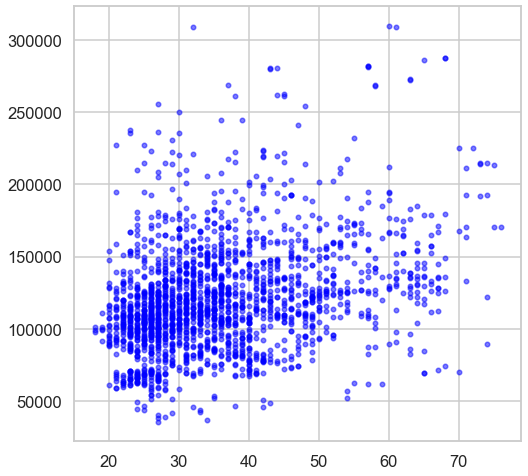

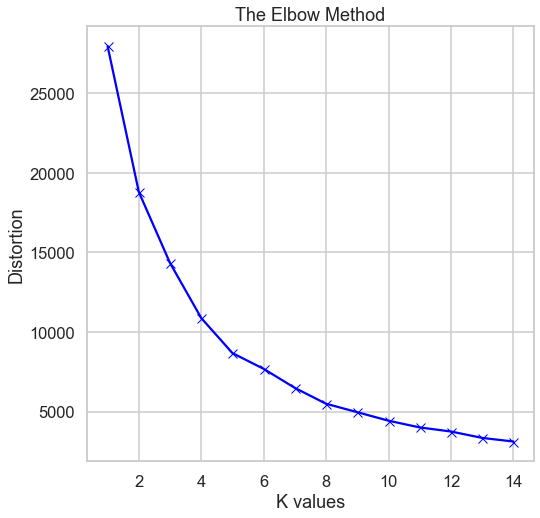

For n_clusters = 2 The average silhouette_score is : 0.5834469068936822
For n_clusters = 3 The average silhouette_score is : 0.5123588174487483
For n_clusters = 4 The average silhouette_score is : 0.5428531921401363
For n_clusters = 5 The average silhouette_score is : 0.5401520680025738
For n_clusters = 6 The average silhouette_score is : 0.5425259952476224
For n_clusters = 7 The average silhouette_score is : 0.5352912102629951
For n_clusters = 8 The average silhouette_score is : 0.5408656763897173
For n_clusters = 9 The average silhouette_score is : 0.5337990878607225
For n_clusters = 10 The average silhouette_score is : 0.534581053316447
For n_clusters = 11 The average silhouette_score is : 0.5408080215187459
For n_clusters = 12 The average silhouette_score is : 0.5449128933958546
For n_clusters = 13 The average silhouette_score is : 0.5412844132621925
For n_clusters = 14 The average silhouette_score is : 0.5430452698829656


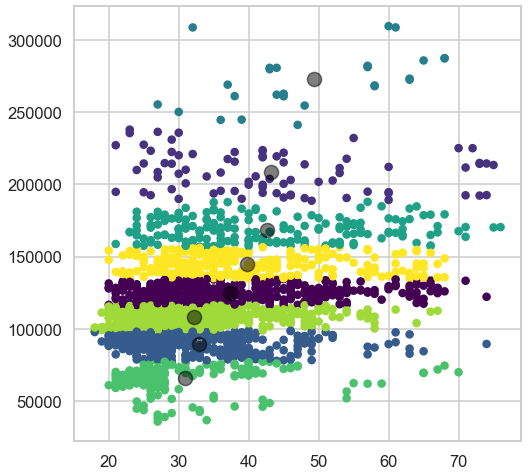

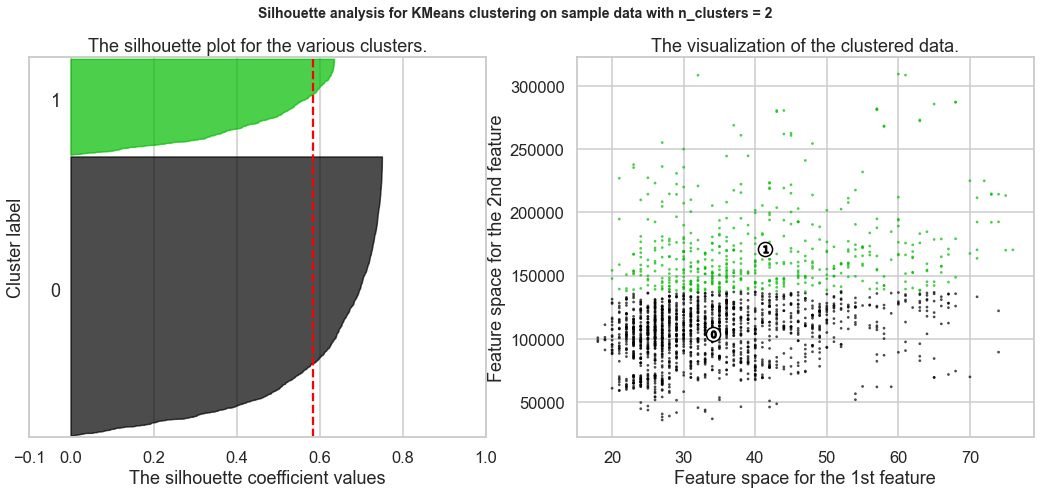

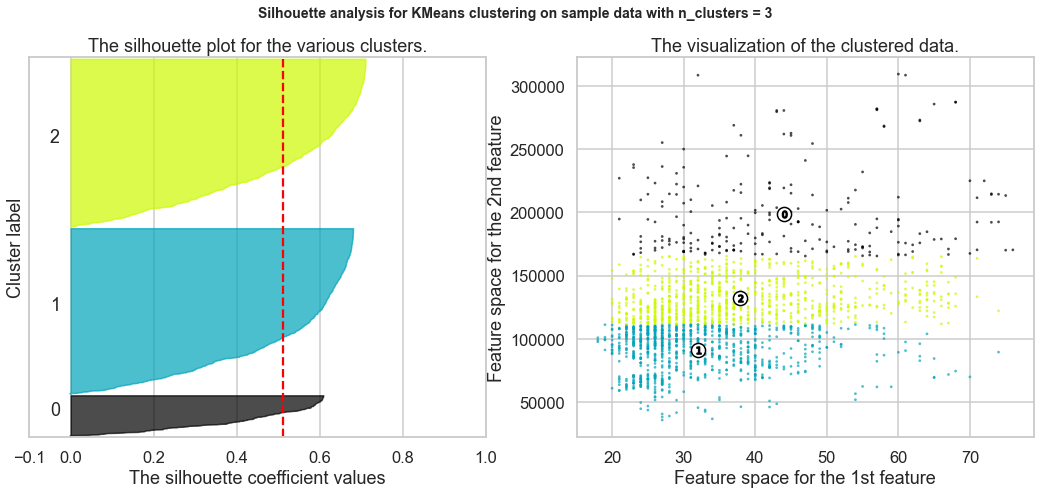

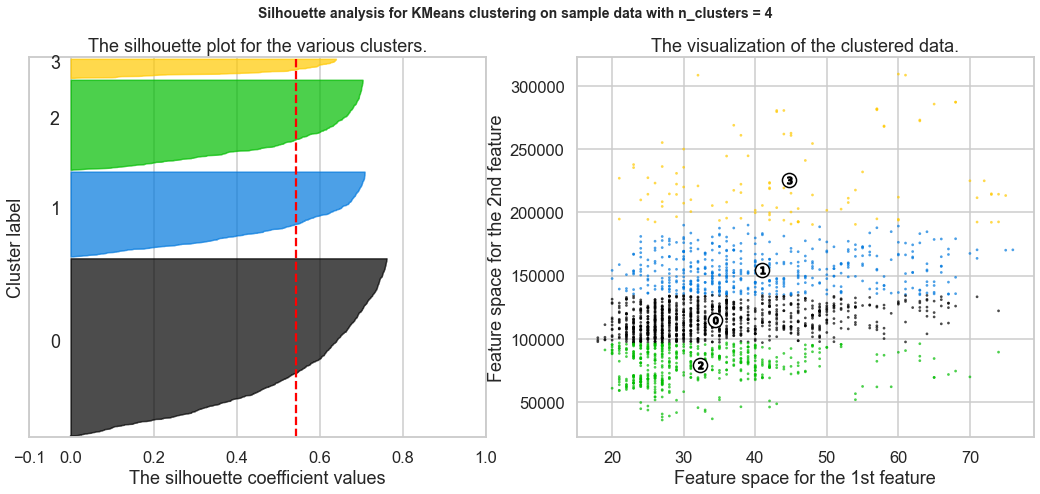

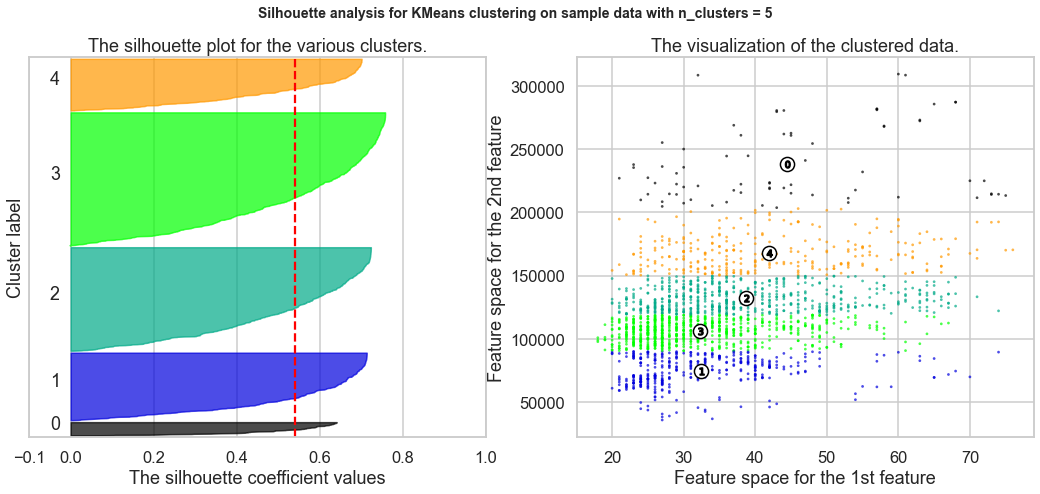

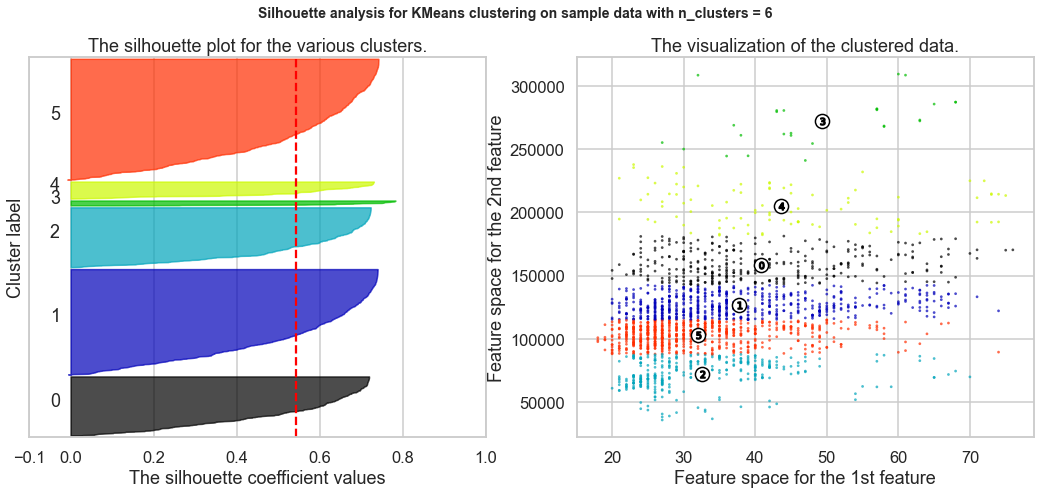

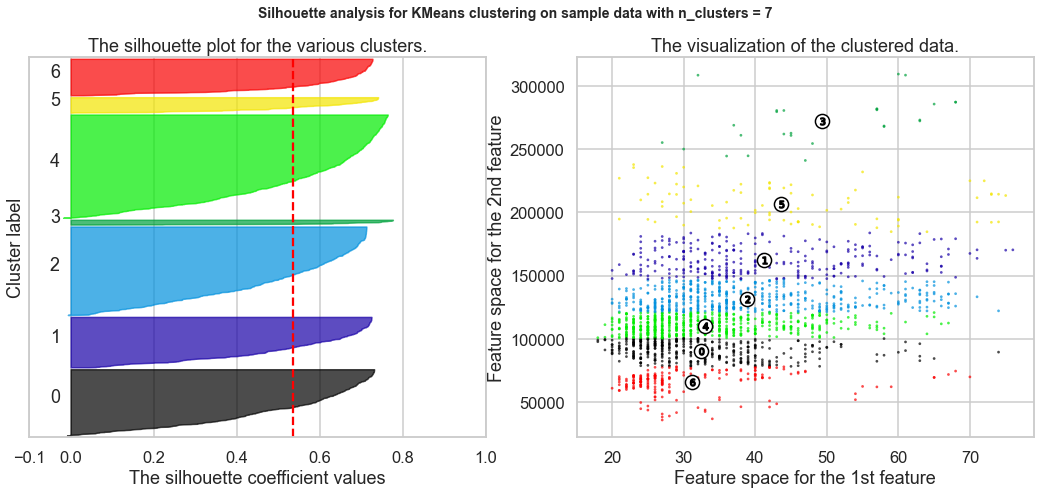

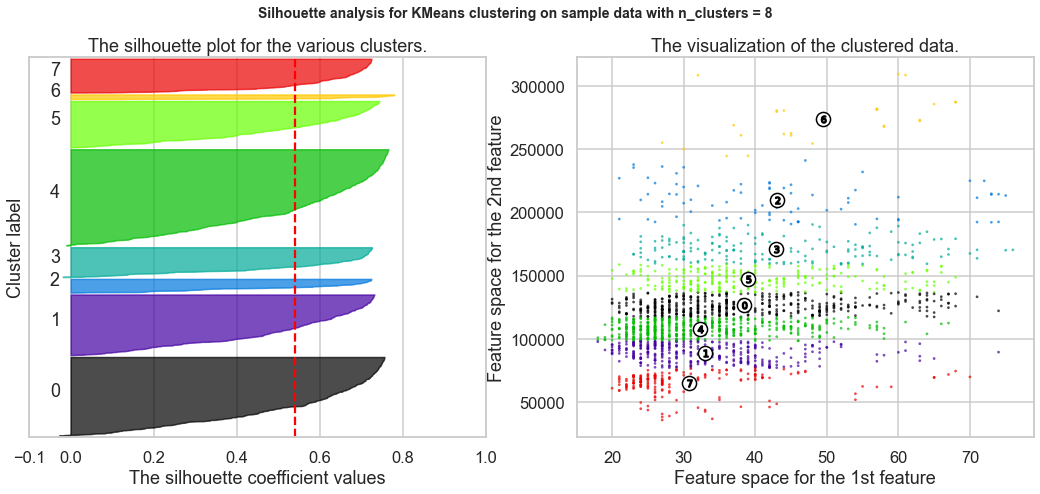

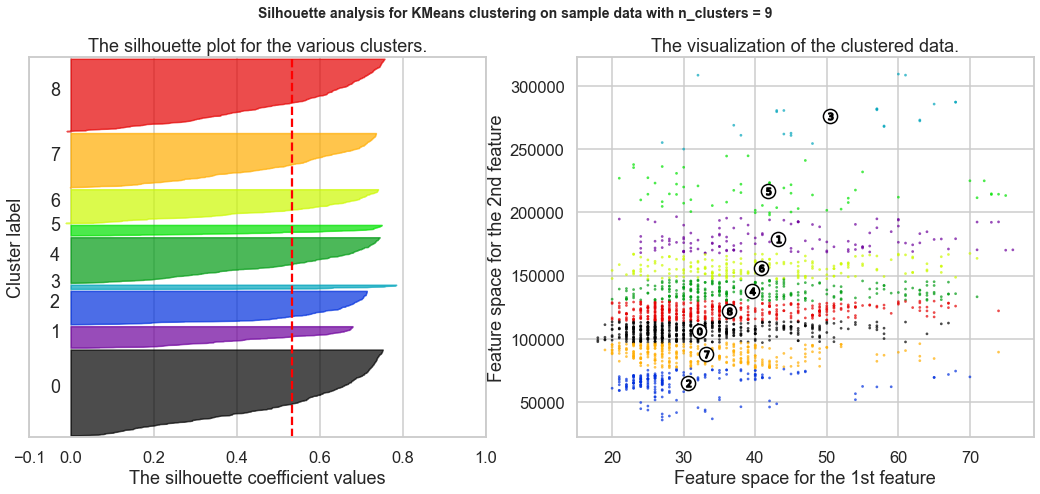

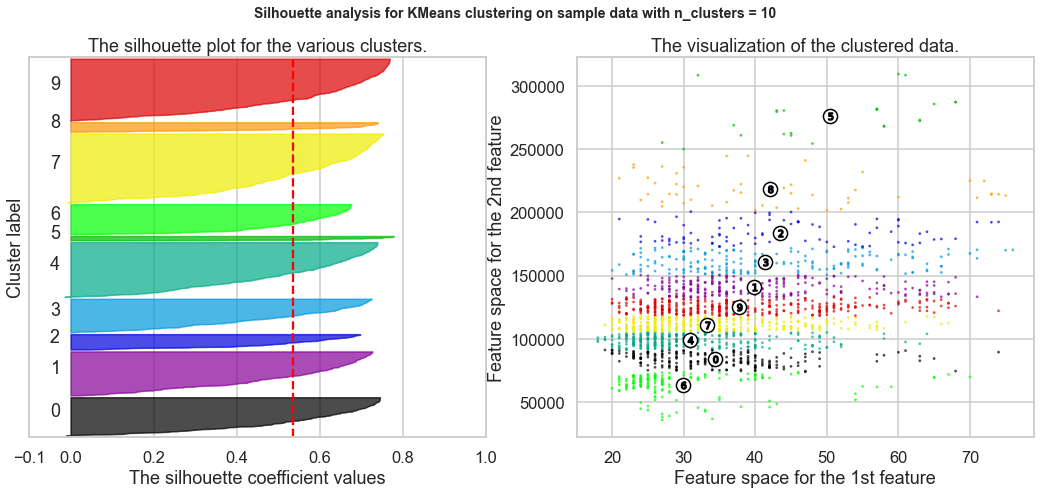

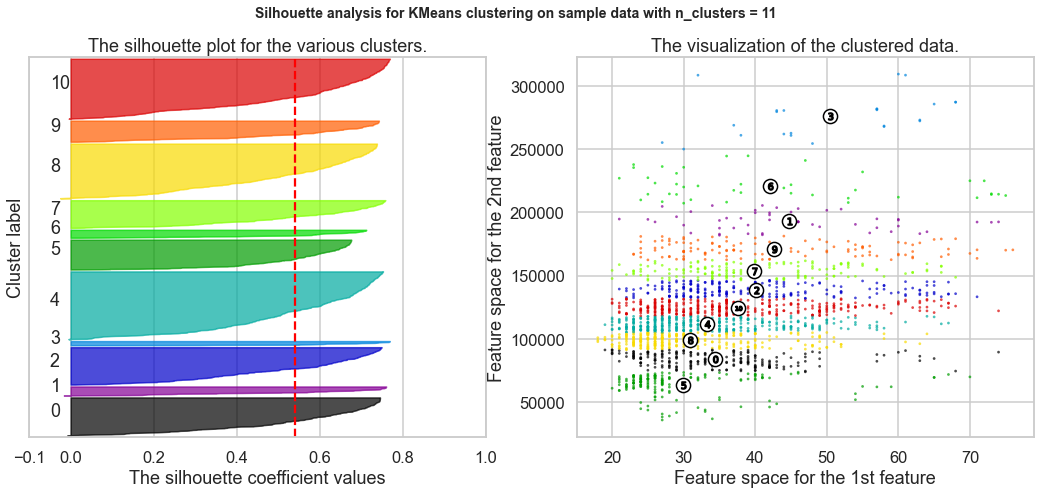

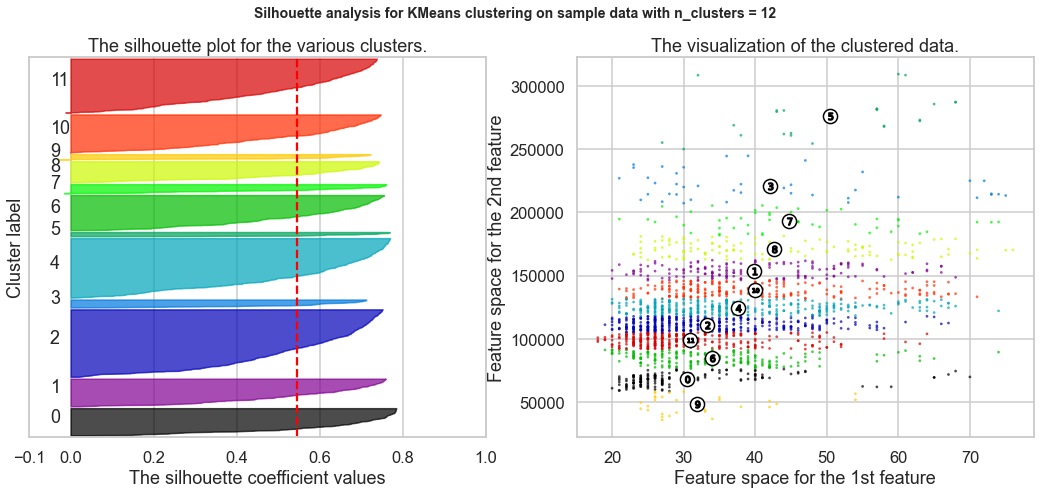

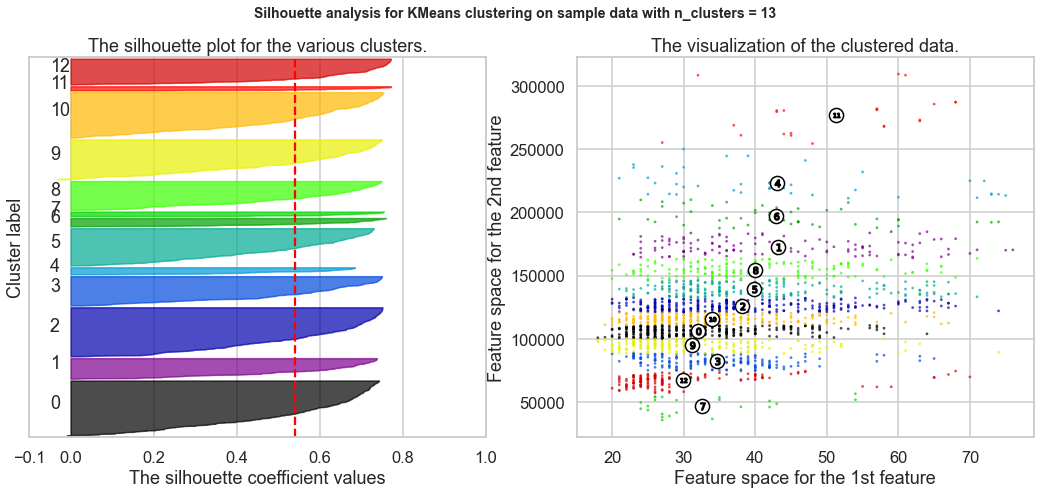

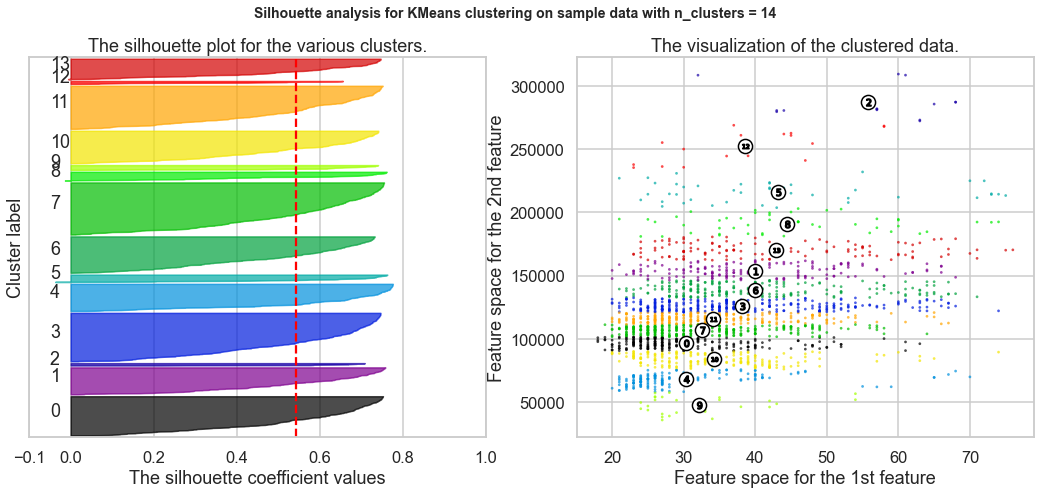

Silhouette Coefficient: 0.302


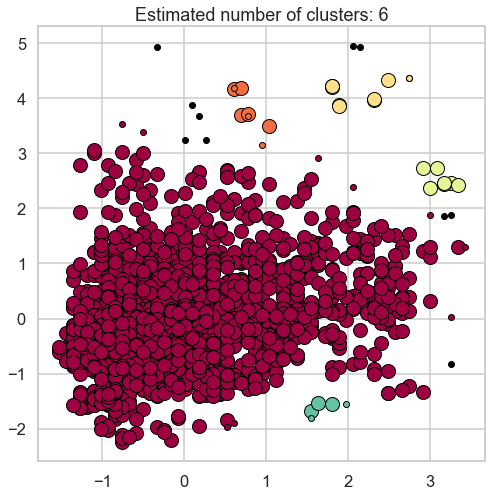

Estimated number of clusters: 24
Silhouette Coefficient: -0.216
Estimated number of clusters: 8
Silhouette Coefficient: 0.170
Estimated number of clusters: 5
Silhouette Coefficient: 0.330
Estimated number of clusters: 7
Silhouette Coefficient: 0.296
Estimated number of clusters: 6
Silhouette Coefficient: 0.302
Estimated number of clusters: 3
Silhouette Coefficient: 0.619
Estimated number of clusters: 3
Silhouette Coefficient: 0.626
Estimated number of clusters: 3
Silhouette Coefficient: 0.622
Estimated number of clusters: 3
Silhouette Coefficient: 0.622
Estimated number of clusters: 2
Silhouette Coefficient: 0.642
Estimated number of clusters: 2
Silhouette Coefficient: 0.642
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters

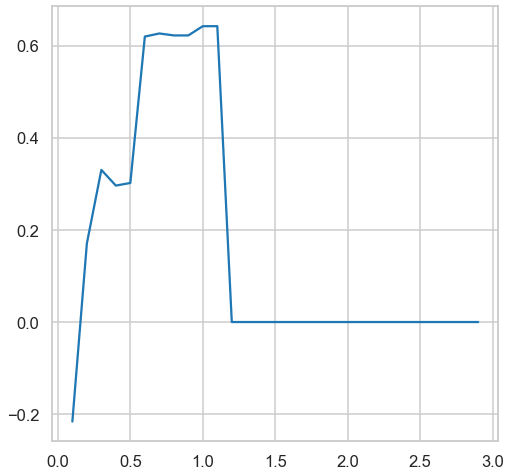

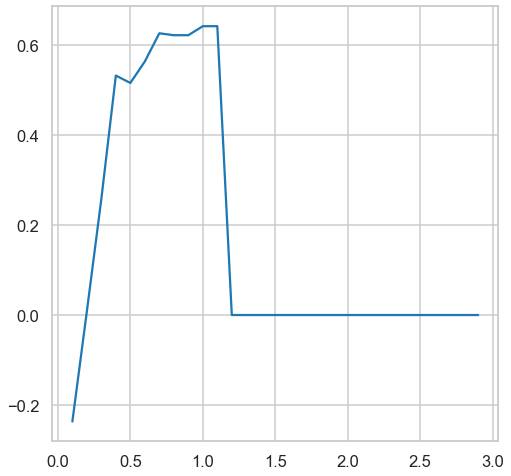

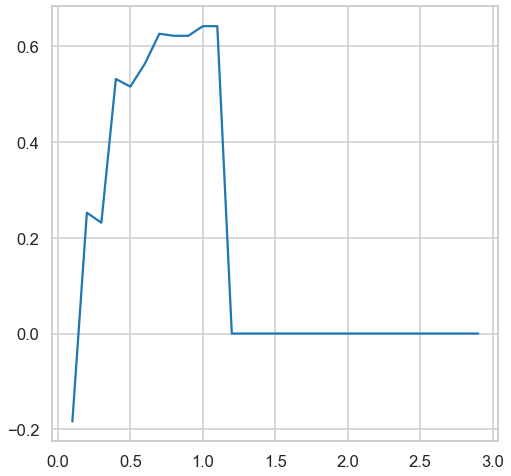

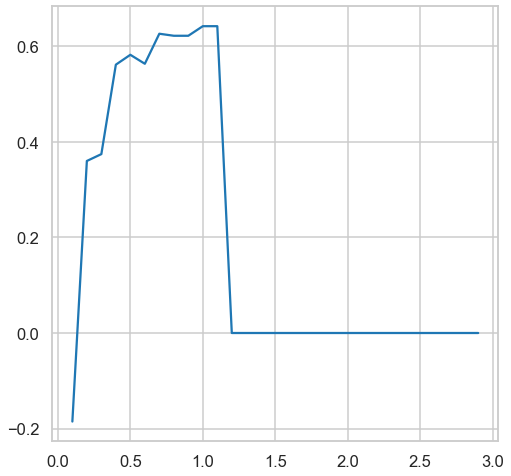

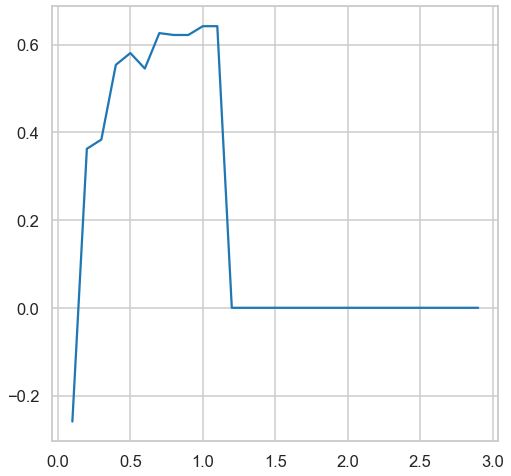

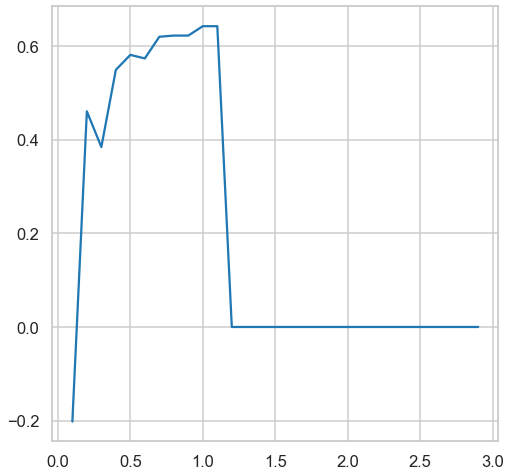

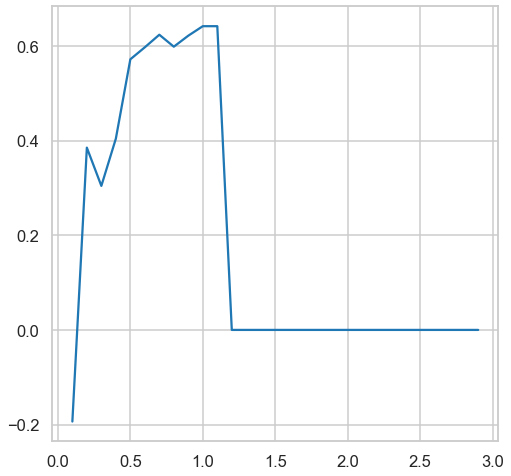

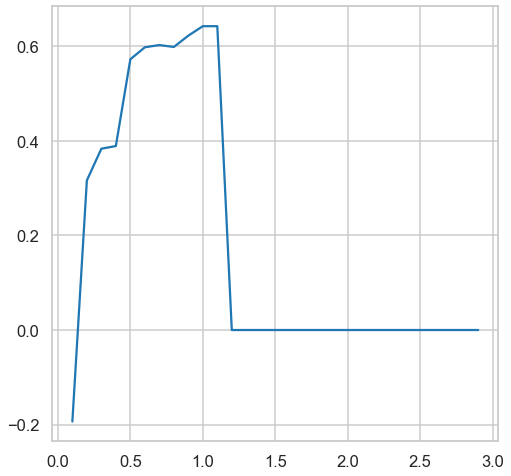

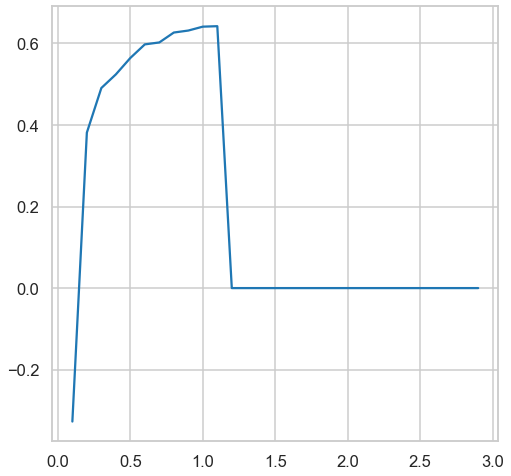

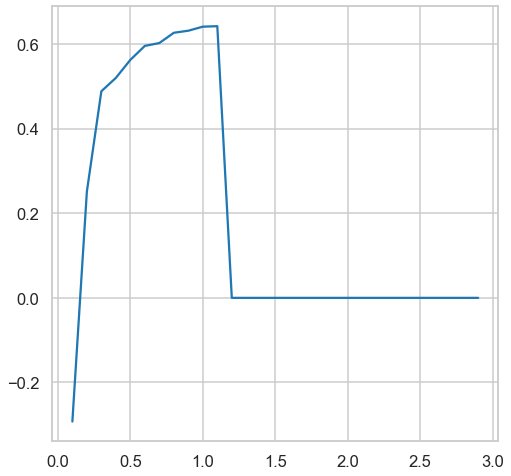

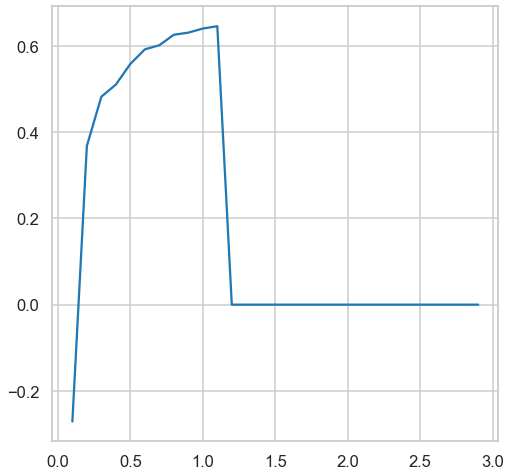

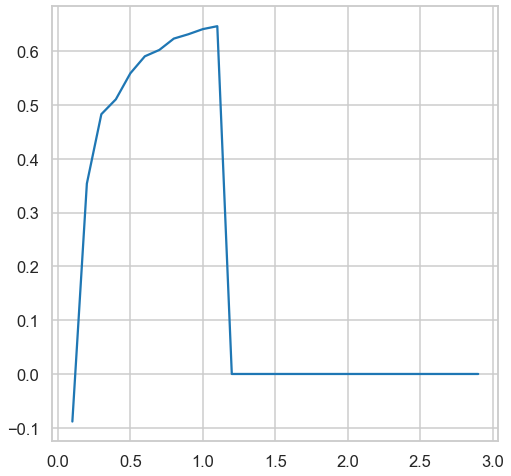

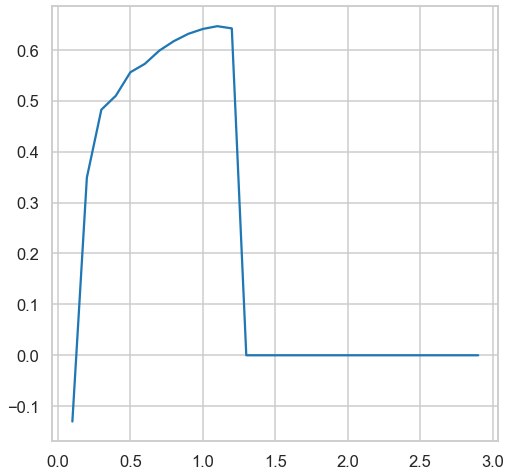

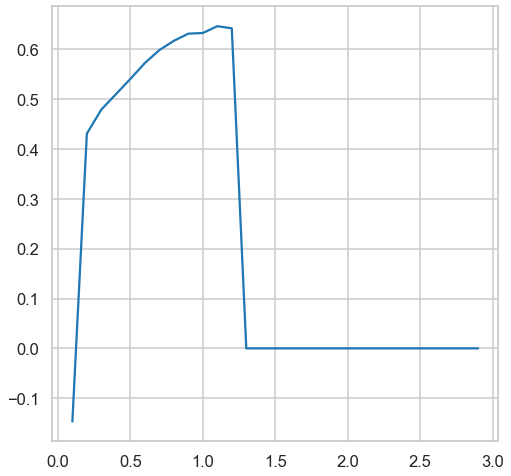

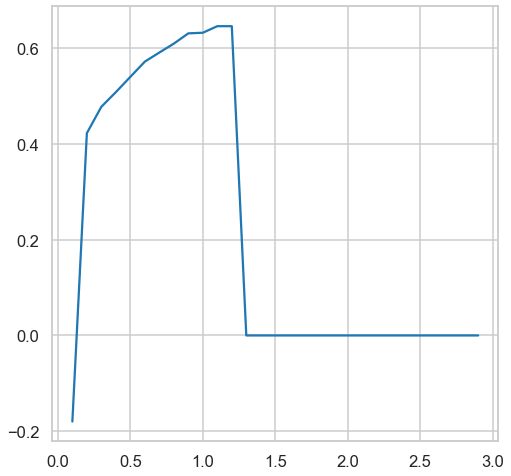

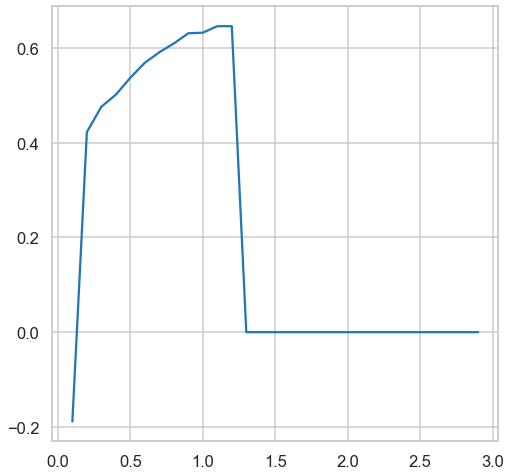

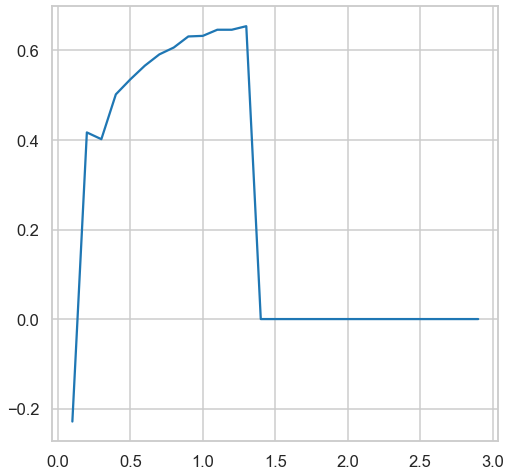

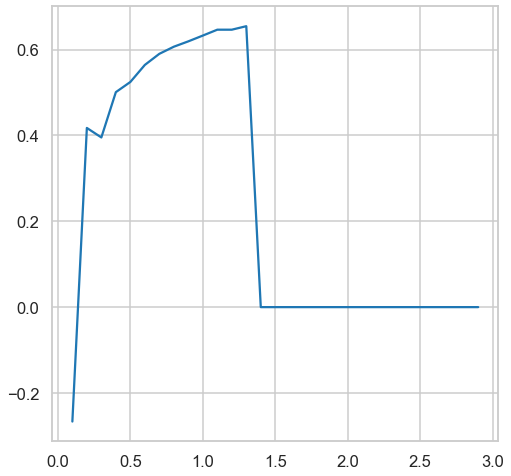

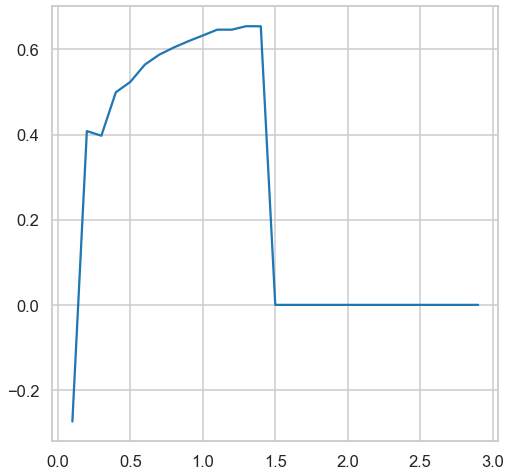

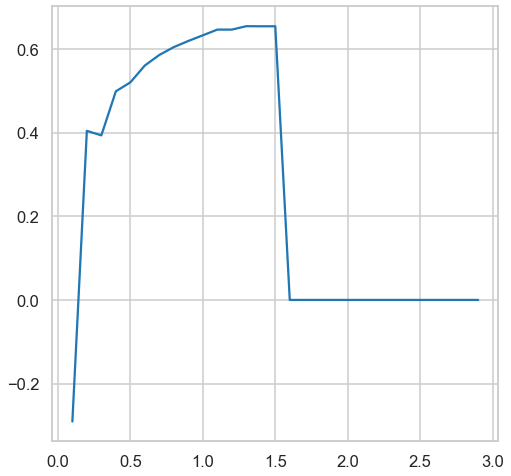

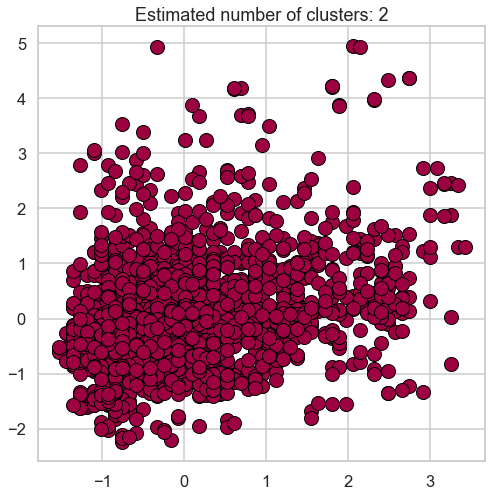

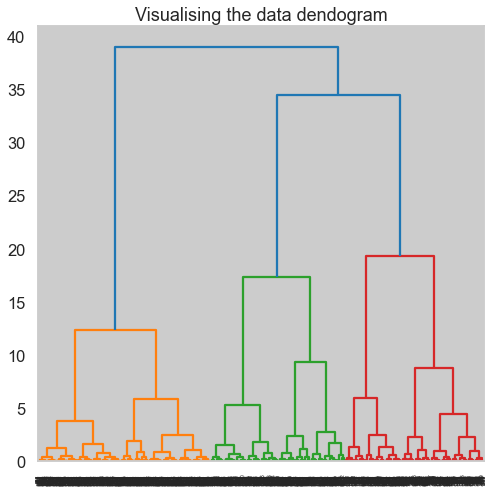

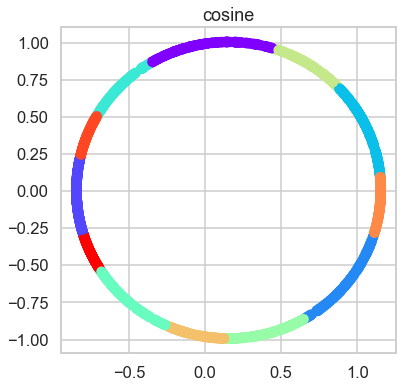

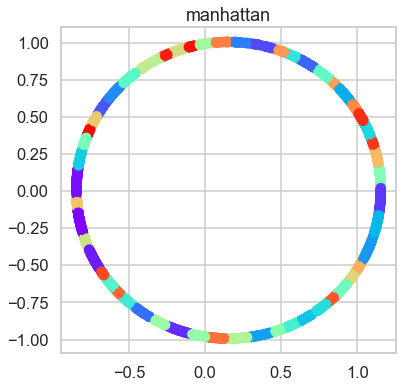

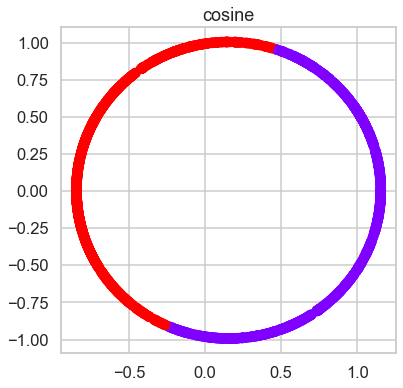

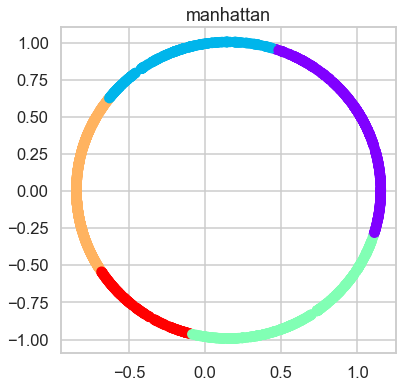

Converged: True
[[0.00123642 0.86233879 0.1364248 ]]


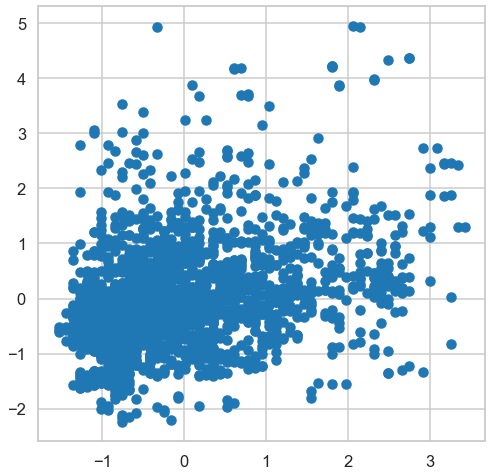

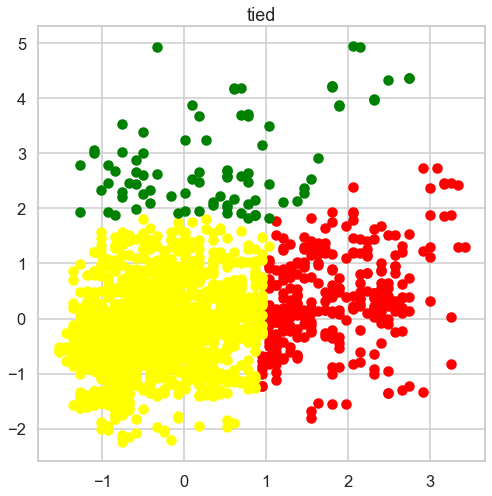

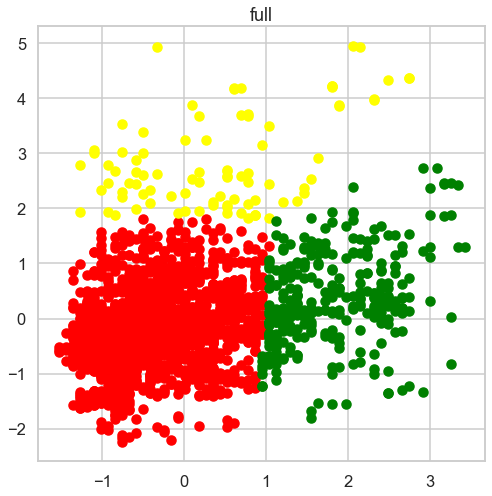

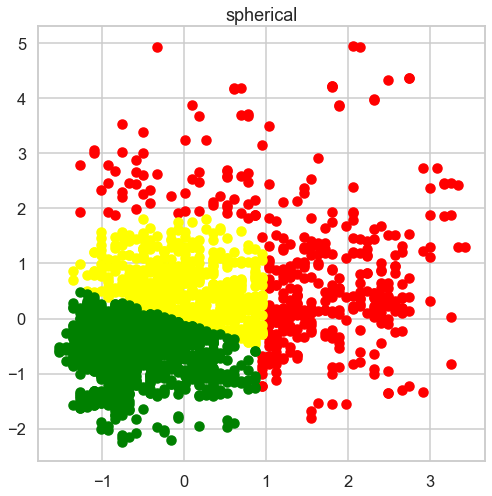

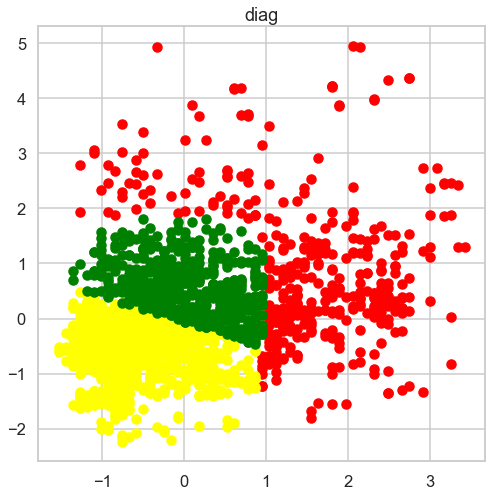

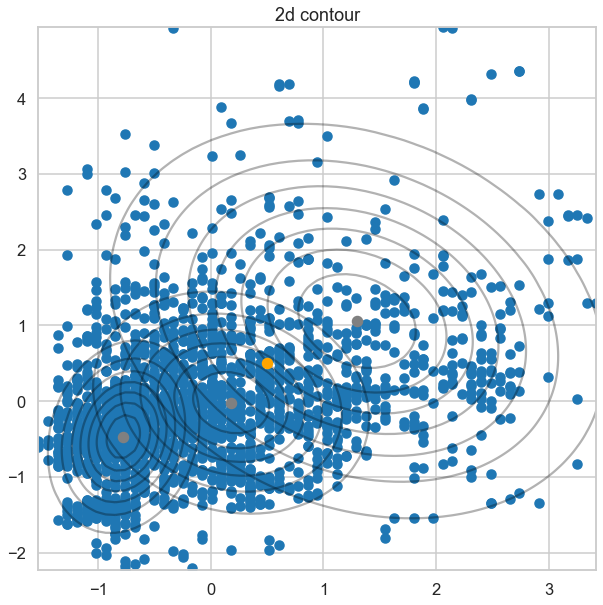

kmeans best: 0.5834469068936822
dbscan best: 0.6544938018985113
Hierarical best 0.5258293390082289
best d: 1.1


In [20]:

Data=pd.read_csv('Customer Data.csv')
[rows,columns]=np.shape(Data)
data=Data.iloc[:,1:columns]
New_data=data[["Age", "Income"]]
X=pd.DataFrame(New_data).to_numpy()
#kmeans
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk' #List colors
    alpha = 0.5 #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
display_cluster(X)
#kmean
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
n_bins = 6
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
   
    
for key, val in mapping1.items():
    print(f'{key} : {val}')
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('K values')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()


kmeans = KMeans(n_clusters=8).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14]
scores=[]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

  
    ax1.set_xlim([-0.1, 1])
  
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    
    silhouette_avg = silhouette_score(X, cluster_labels)
    scores=np.append(scores,silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

       
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

   
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

   
    centers = clusterer.cluster_centers_
   
    ax2.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
  
K_used=np.argmax(scores)+2
Best_score=np.max(scores)
plt.show()
#dbscan
dbscan_score=[];
score=0;
k_clusters=[];
all_scores=[];


X = StandardScaler().fit_transform(X)


db = DBSCAN(eps=0.5,min_samples=5) 
db.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


n_clusters_ = len(set(labels)) 




print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


epsilon=np.arange(0.1,3,0.1)
min_samples=np.arange(5,25,1)

dbscan_score=[];
score=0;
k_clusters=[];
all_scores=[];





epsilon=np.arange(0.1,3,0.1)
min_samples=np.arange(5,25,1)

dbscan_score=[];
score=0;
k_clusters=[];
all_scores=[];
for s in min_samples:
    dbscan_score=[];
    for e in epsilon:
        db = DBSCAN(eps=e, min_samples=s).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        

        n_clusters_ = len(set(labels)) 
        

        print("Estimated number of clusters: %d" % n_clusters_)
        if  n_clusters_!=1:
            print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
            score=metrics.silhouette_score(X, labels);
        else:
            score=0
        dbscan_score.append(score)
        all_scores.append(score)
        k_clusters.append(n_clusters_)
    plt.figure()
    plt.plot(epsilon.flatten(),dbscan_score)
   
index=np.argmax(all_scores)
max_score=np.max(all_scores)

best_score_dbscan=all_scores[index]

dbscan_best_k=k_clusters[index]


plt.figure()

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
      
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % dbscan_best_k)
plt.show()

#hierarical
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  

X_normalized = normalize(X_scaled)
  

X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

plt.figure(figsize =(8, 8))
plt.title('Visualising the data dendogram')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
distance_th=np.arange(0.1,2,1)
silhouette_scores = []
for i in range(np.size(distance_th)):
    Hi1=AgglomerativeClustering(n_clusters =None,affinity='euclidean',linkage='single',distance_threshold=distance_th[i])
    Hi1_p=Hi1.fit_predict(X_principal)
    Hi1_clusters=np.max(Hi1_p)+1
    if Hi1_clusters!=1:
        silhouette_scores.append(silhouette_score(X_principal, Hi1.fit_predict(X_principal)))
        plt.figure(figsize =(6, 6))
        plt.title('euclidean')
        plt.scatter(X_principal['P1'], X_principal['P2'], c = Hi1.fit_predict(X_principal), cmap ='rainbow')
        plt.show()

   
    Hi2=AgglomerativeClustering(n_clusters =None,affinity='cosine',linkage='average',distance_threshold=distance_th[i])
    Hi2_p=Hi2.fit_predict(X_principal)
    Hi2_clusters=np.max(Hi2_p)+1
    if Hi2_clusters!=1:
        silhouette_scores.append(silhouette_score(X_principal, Hi2.fit_predict(X_principal)))
        plt.figure(figsize =(6, 6))
        plt.title('cosine')
        plt.scatter(X_principal['P1'], X_principal['P2'], c = Hi2.fit_predict(X_principal), cmap ='rainbow')
        plt.show()
    
    Hi3=AgglomerativeClustering(n_clusters = None,affinity='manhattan',linkage='average',distance_threshold=distance_th[i])
    Hi3_p=Hi3.fit_predict(X_principal)
    Hi3_clusters=np.max(Hi3_p)+1
    if Hi3_clusters!=1:
        silhouette_scores.append(silhouette_score(X_principal, Hi3.fit_predict(X_principal)))
        plt.figure(figsize =(6, 6))
        plt.title('manhattan')
        plt.scatter(X_principal['P1'], X_principal['P2'], c = Hi3.fit_predict(X_principal), cmap ='rainbow')
        plt.show()
final_score_=np.max(silhouette_scores)
#gaussian
d = pd.DataFrame(X)
 

plt.scatter(d[0], d[1])
gmm = GaussianMixture(n_components = 3,covariance_type='tied')
gmm.fit(d)
 

labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 

plt.figure()
plt.title('tied')
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')


gmm = GaussianMixture(n_components = 3,covariance_type='full')
gmm.fit(d)
 

labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 

plt.figure()
plt.title('full')
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')



gmm = GaussianMixture(n_components = 3,covariance_type='spherical')
gmm.fit(d)
 

labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 

plt.figure()
plt.title('spherical')
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')


gmm = GaussianMixture(n_components = 3,covariance_type='diag')
gmm.fit(d)
 

labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
plt.figure()
plt.title('diag')
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')


x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

GMM = GaussianMixture(n_components=3).fit(X) 
print('Converged:',GMM.converged_) 
means = GMM.means_ 
covariances = GMM.covariances_



Y = np.array([[0.5],[0.5]])
prediction = GMM.predict_proba(Y.T)
print(prediction)

   
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(X[:,0],X[:,1])
ax0.scatter(Y[0,:],Y[1,:],c='orange',zorder=10,s=100)
for m,c in zip(means,covariances):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
    ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
plt.title('2d contour')    
plt.show()
print('kmeans best:',Best_score)
print('dbscan best:',max_score)
print('Hierarical best',final_score_)
print('best d:',distance_th[i])
#comment:
    #DBscan best technique with score 0.6544